# House Value Prediction Project

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import lightgbm as Igb
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import tensorflow as tf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.impute import SimpleImputer

import warnings

warnings.filterwarnings("ignore")

# Import Dataset

In [2]:
data=pd.read_csv("housing.csv")

In [3]:
data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

# Exploratory Data Analysis

In [3]:
data.shape

(20640, 10)

In [5]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
#check summary statistics of data

data.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [5]:
#check for nulls

data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
#check for nulls

data.duplicated().sum()

np.int64(0)

# Data cleaning & Preprocessing

### Handling missing values

In [7]:
imputer = SimpleImputer(strategy='median')  # Use median strategy
data['total_bedrooms'] = imputer.fit_transform(data[['total_bedrooms']])

In [8]:
data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

### Splitting ocean_proximity categories into individual columns

In [9]:
data=pd.get_dummies(data, columns=['ocean_proximity'],drop_first=True,dtype='int')

### Standardizing the median income column

In [10]:
# Multiply the 'median_income' column by 10000 to scale up the values
data['median_income'] = data['median_income'] * 10000

# Check the first few rows to confirm the transformation
print(data[['median_income']].head())

   median_income
0        83252.0
1        83014.0
2        72574.0
3        56431.0
4        38462.0


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  float64
 3   total_rooms                 20640 non-null  float64
 4   total_bedrooms              20640 non-null  float64
 5   population                  20640 non-null  float64
 6   households                  20640 non-null  float64
 7   median_income               20640 non-null  float64
 8   median_house_value          20640 non-null  float64
 9   ocean_proximity_INLAND      20640 non-null  int64  
 10  ocean_proximity_ISLAND      20640 non-null  int64  
 11  ocean_proximity_NEAR BAY    20640 non-null  int64  
 12  ocean_proximity_NEAR OCEAN  20640 non-null  int64  
dtypes: float64(9), int64(4)
memory 

# Correlation

In [15]:
#check correlation

data.corr()

longitude  latitude  housing_median_age  \
longitude                    1.000000 -0.924664           -0.108197   
latitude                    -0.924664  1.000000            0.011173   
housing_median_age          -0.108197  0.011173            1.000000   
total_rooms                  0.044568 -0.036100           -0.361262   
total_bedrooms               0.069120 -0.066484           -0.319026   
population                   0.099773 -0.108785           -0.296244   
households                   0.055310 -0.071035           -0.302916   
median_income               -0.015176 -0.079809           -0.119034   
median_house_value          -0.045967 -0.144160            0.105623   
ocean_proximity_INLAND      -0.055575  0.351166           -0.236645   
ocean_proximity_ISLAND       0.009446 -0.016572            0.017020   
ocean_proximity_NEAR BAY    -0.474489  0.358771            0.255172   
ocean_proximity_NEAR OCEAN   0.045509 -0.160818            0.021622   

                            total_rooms  total_bedrooms  population  \
longitude                      0.044568        0.069120    0.099773   
latitude                      -0.036100       -0.066484   -0.108785   
housing_median_age            -0.361262       -0.319026   -0.296244   
total_rooms                    1.000000        0.927058    0.857126   
total_bedrooms                 0.927058        1.000000    0.873535   
population                     0.857126        0.873535    1.000000   
households                     0.918484        0.974366    0.907222   
median_income                  0.198050       -0.007617    0.004834   
median_house_value             0.134153        0.049457   -0.024650   
ocean_proximity_INLAND         0.025624       -0.006158   -0.020732   
ocean_proximity_ISLAND        -0.007572       -0.004322   -0.010412   
ocean_proximity_NEAR BAY      -0.023022       -0.019667   -0.060880   
ocean_proximity_NEAR OCEAN    -0.009175        0.000557   -0.024264   

                            households  median_income  median_house_value  \
longitude                     0.055310      -0.015176           -0.045967   
latitude                     -0.071035      -0.079809           -0.144160   
housing_median_age           -0.302916      -0.119034            0.105623   
total_rooms                   0.918484       0.198050            0.134153   
total_bedrooms                0.974366      -0.007617            0.049457   
population                    0.907222       0.004834           -0.024650   
households                    1.000000       0.013033            0.065843   
median_income                 0.013033       1.000000            0.688075   
median_house_value            0.065843       0.688075            1.000000   
ocean_proximity_INLAND       -0.039402      -0.237496           -0.484859   
ocean_proximity_ISLAND       -0.009077      -0.009228            0.023416   
ocean_proximity_NEAR BAY     -0.010093       0.056197            0.160284   
ocean_proximity_NEAR OCEAN    0.001714       0.027344            0.141862   

                            ocean_proximity_INLAND  ocean_proximity_ISLAND  \
longitude                                -0.055575                0.009446   
latitude                                  0.351166               -0.016572   
housing_median_age                       -0.236645                0.017020   
total_rooms                               0.025624               -0.007572   
total_bedrooms                           -0.006158               -0.004322   
population                               -0.020732               -0.010412   
households                               -0.039402               -0.009077   
median_income                            -0.237496               -0.009228   
median_house_value                       -0.484859                0.023416   
ocean_proximity_INLAND                    1.000000               -0.010614   
ocean_proximity_ISLAND                   -0.010614                1.000000   
ocean_proximity_NEAR BA

<Axes: >

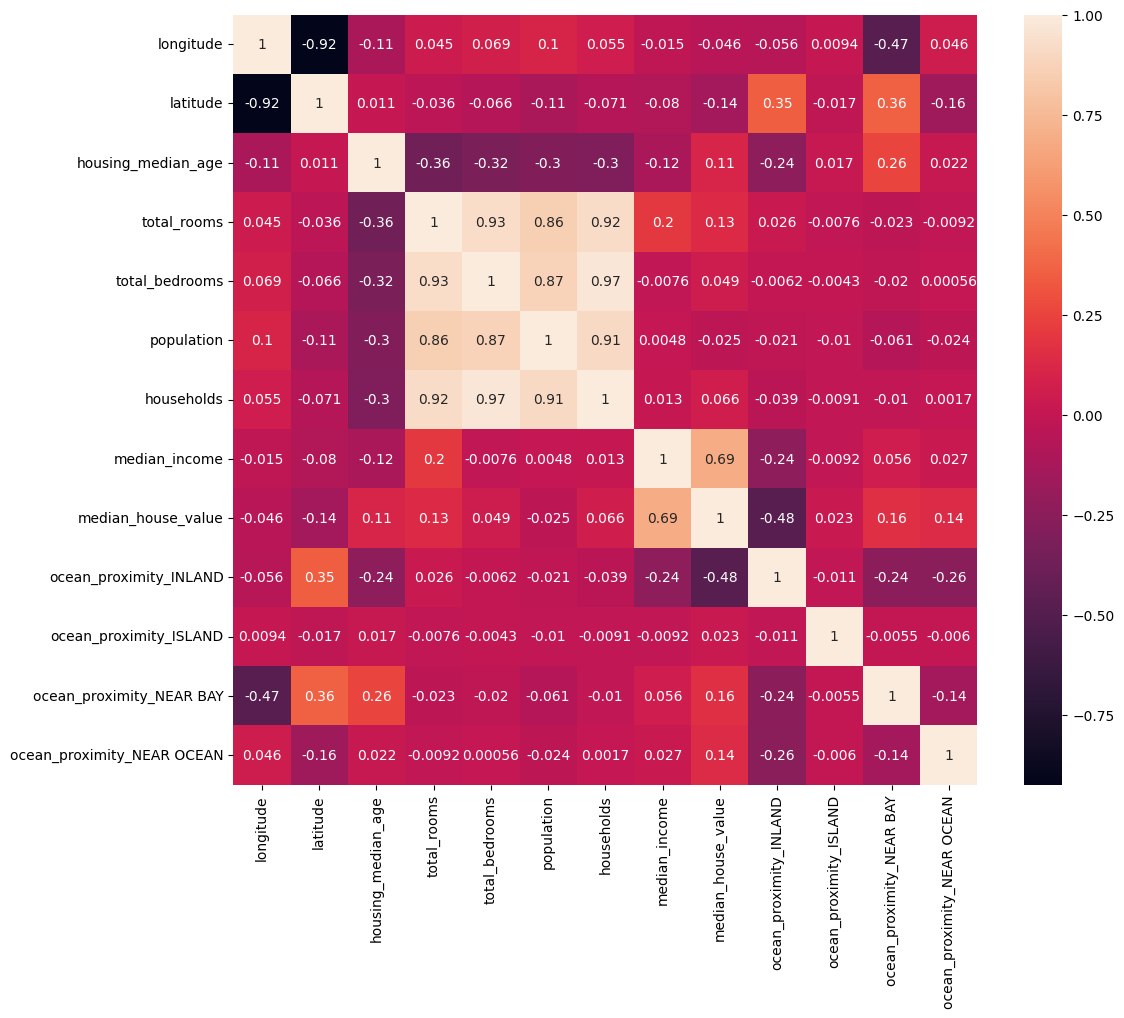

In [16]:
#plot correlation

plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True)

# Distribution of Features

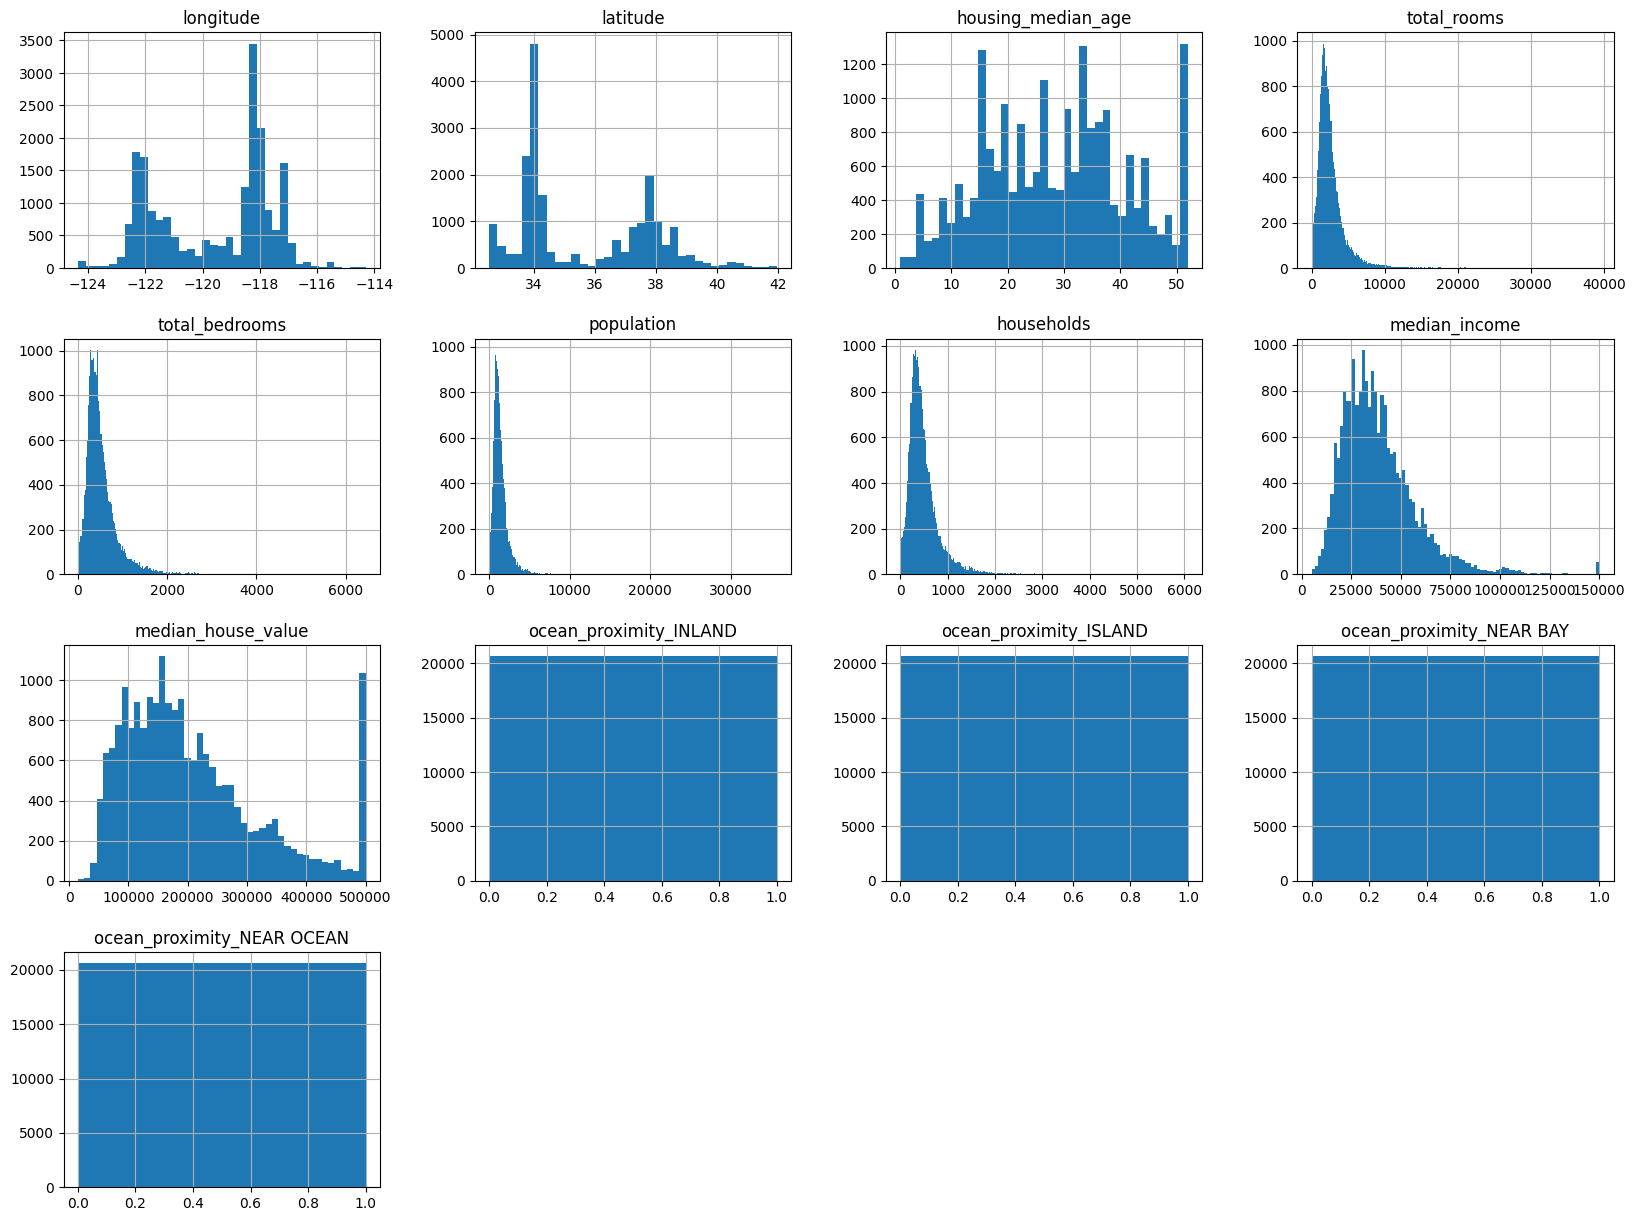

In [17]:
data.hist(figsize=(20, 15), bins="auto")
plt.show()

# Feature engineering

In [11]:
### 1️⃣ Rooms per Household
data['rooms_per_household'] = data['total_rooms'] / data['households']

### 2️⃣ Bedrooms per Room
data['bedrooms_per_room'] = data['total_bedrooms'] / data['total_rooms']

### 3️⃣ Population per Household
data['population_per_household'] = data['population'] / data['households']


In [20]:
data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  \
0       322.0       126.0        83252.0            452600.0   
1      2401.0      1138.0        83014.0            358500.0   
2       496.0       177.0        72574.0            352100.0   
3       558.0       219.0        56431.0            341300.0   
4       565.0       259.0        38462.0            342200.0   

   ocean_proximity_INLAND  ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                       0                       0                         1   
1                       0                       0                         1   
2                       0                       0                         1   
3                       0                       0                         1   
4                       0                       0                         1   

   ocean_proximity_NEAR OCEAN  rooms_per_household  bedrooms_per_room  \
0                           0             6.984127           0.146591   
1                           0             6.238137           0.155797   
2                           0             8.288136           0.129516   
3                           0             5.817352           0.184458   
4                           0             6.281853           0.172096   

   population_per_household  
0                  2.555556  
1                  2.109842  
2                  2.802260  
3                  2.547945  
4                  2.181467

## Correlation after adding new features

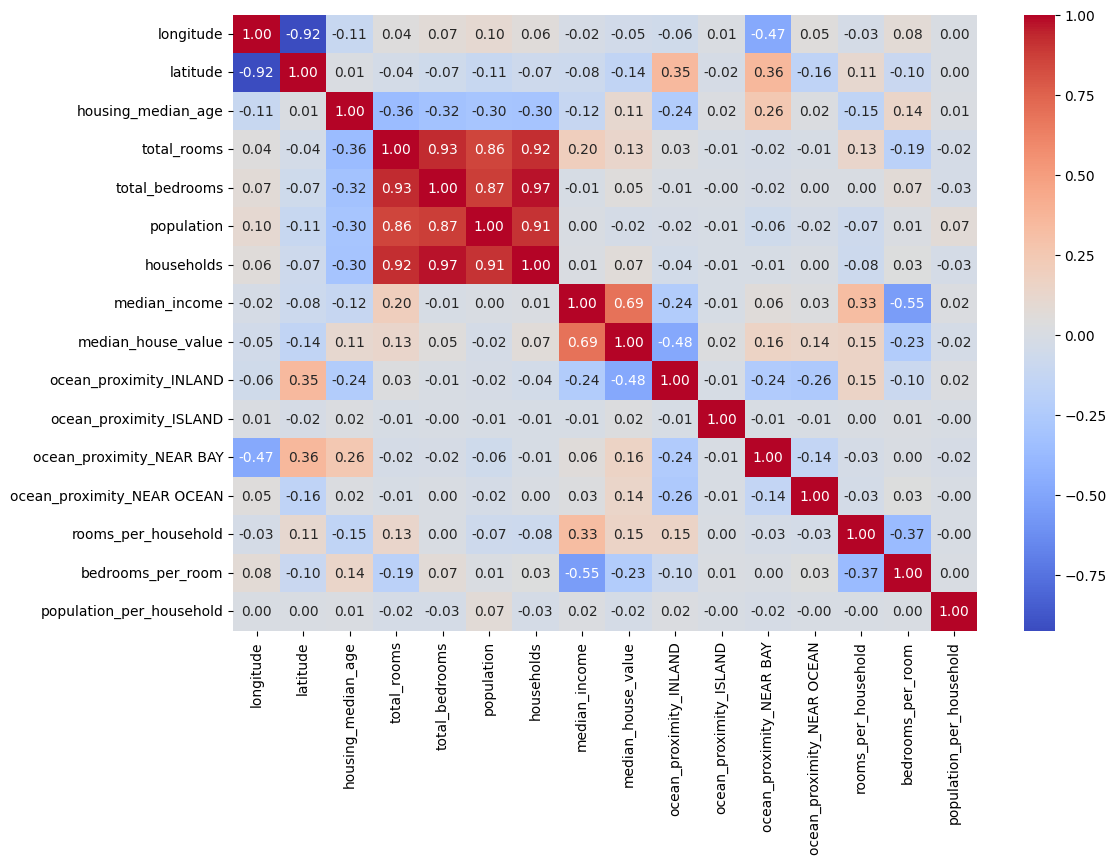

In [21]:
# Correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

#The strongly correlated features with Median house value are Median Income, Ocean proximity Inland While Ocean proximity Near bay, RoomsPerHousehold and Ocean Proximity Near Ocean, House Median age shows a Moderate correlation with Median House Value and Longitude, Latitude and Bedrooms per Room showing the weakest correlation.

# Data Visualization

## Distribution of updated data

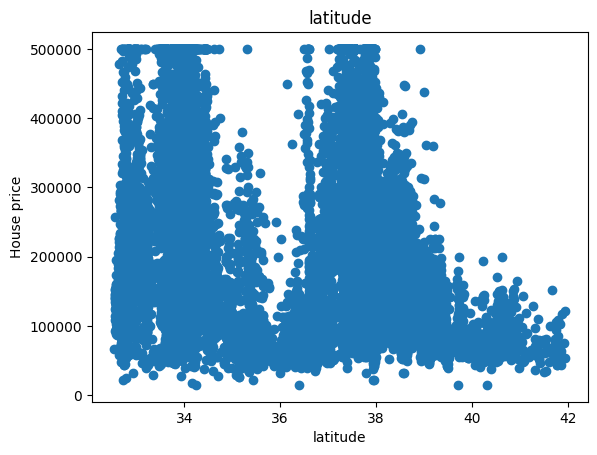

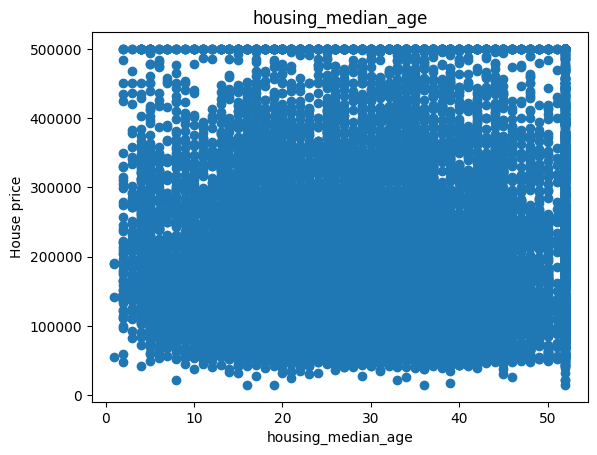

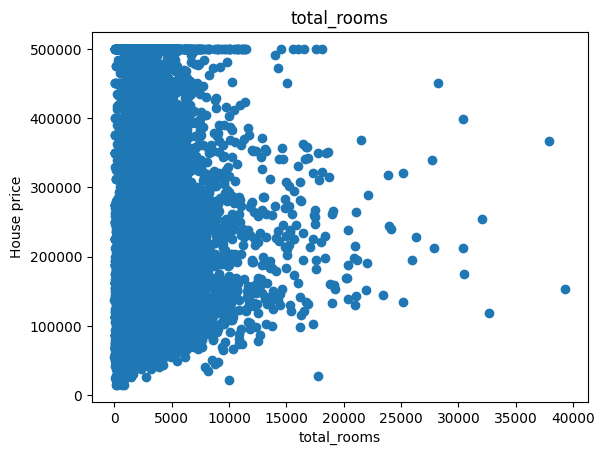

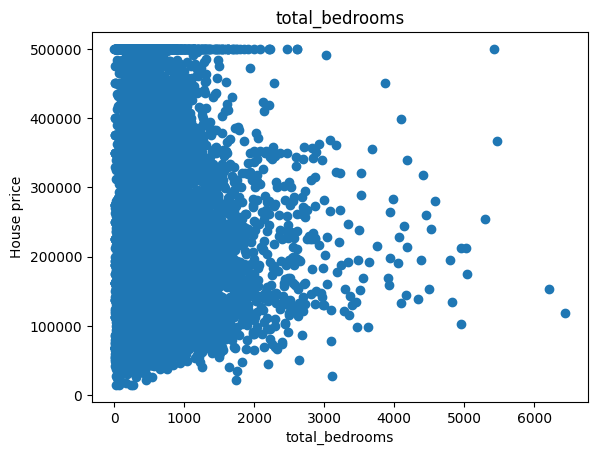

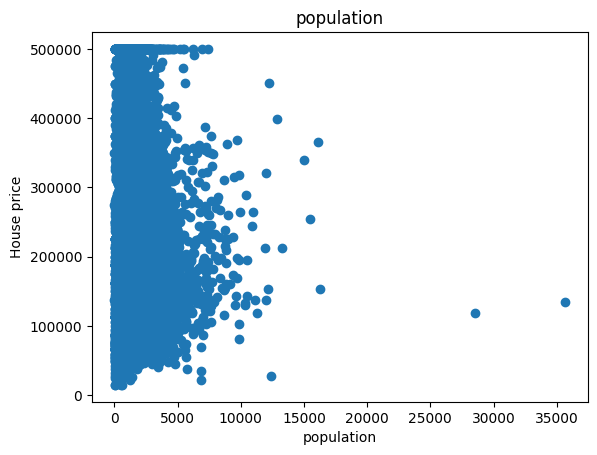

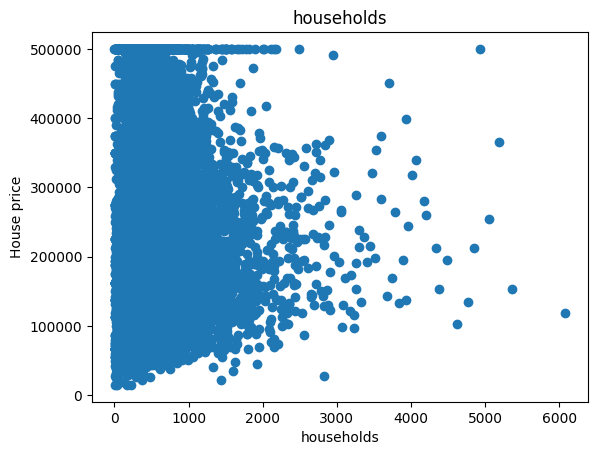

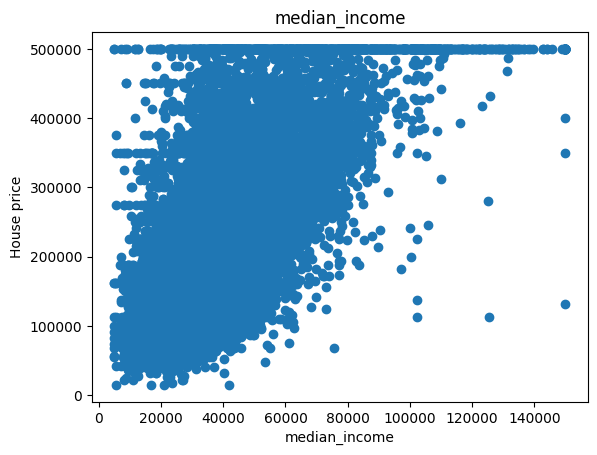

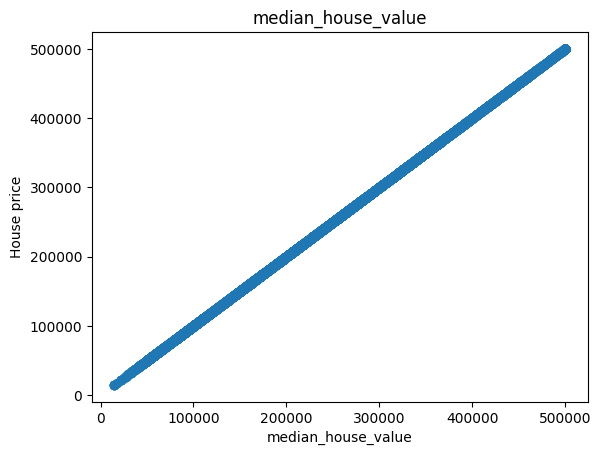

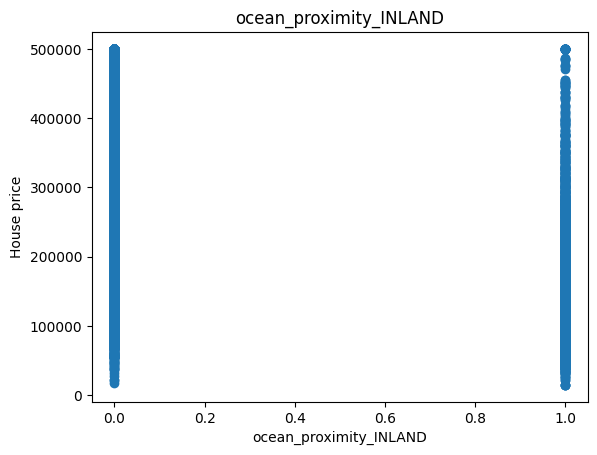

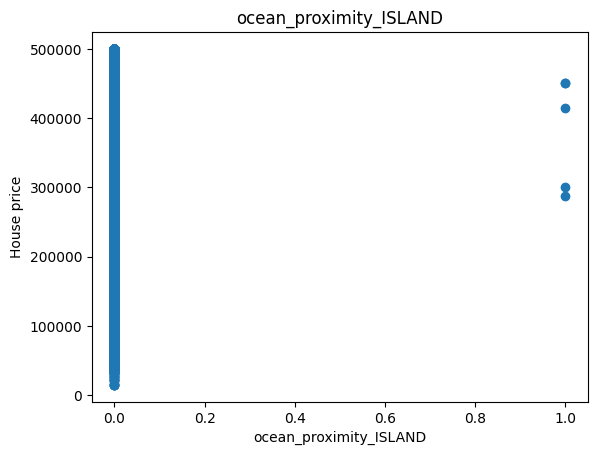

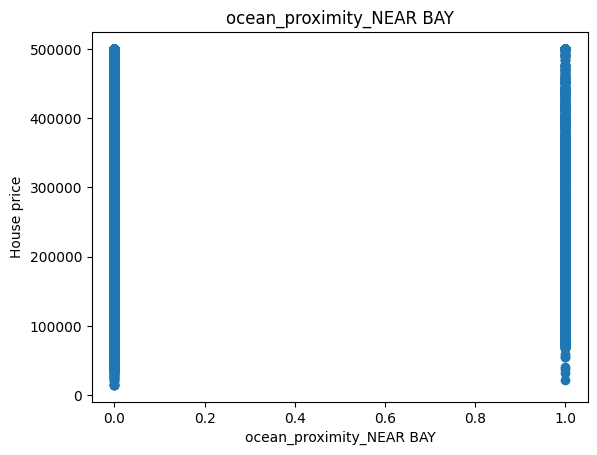

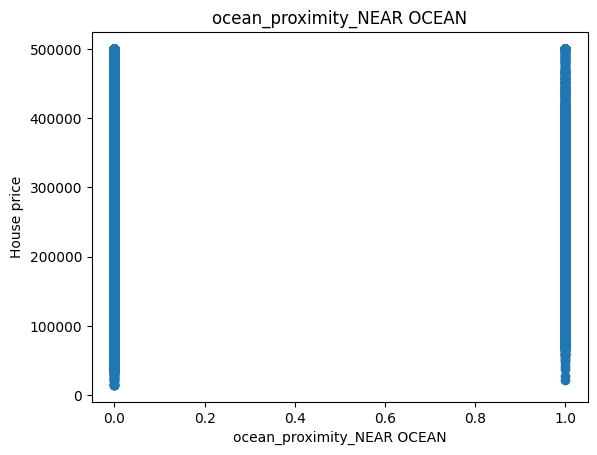

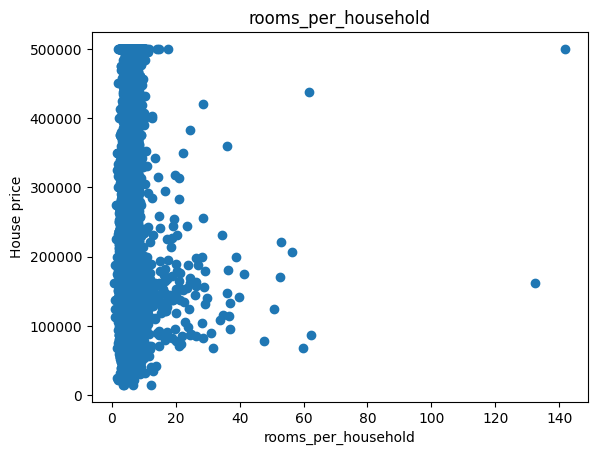

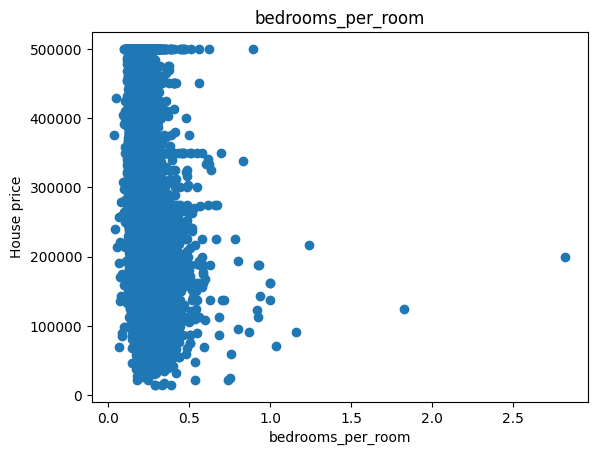

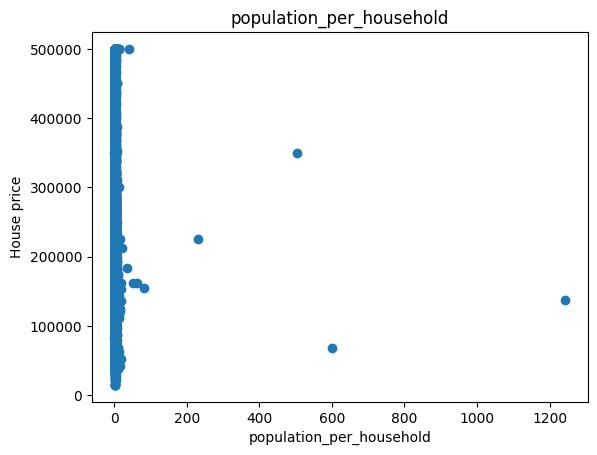

In [13]:
for label in data.columns[1:]:
    plt.scatter(data[label], data['median_house_value'])
    plt.title(label)
    plt.ylabel('House price')
    plt.xlabel(label)
    plt.show()

### checking the relationship between longitude,latitude and House prices

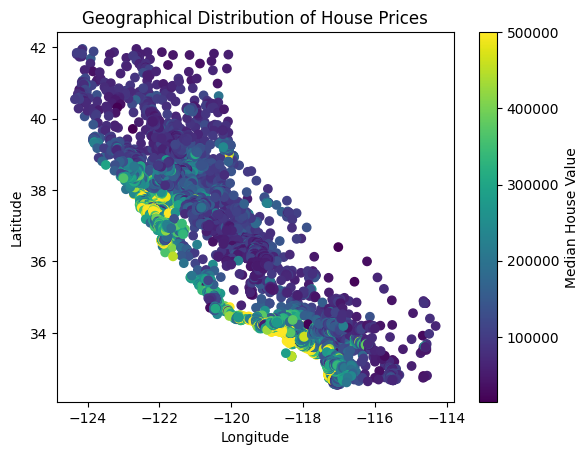

In [22]:
plt.scatter(data['longitude'], data['latitude'], c=data['median_house_value'], cmap='viridis')
plt.colorbar(label='Median House Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of House Prices')
plt.show()

#Latitude showed clustering effects, certain latitudinal had generally higher house prices,suggesting a location-price relationship

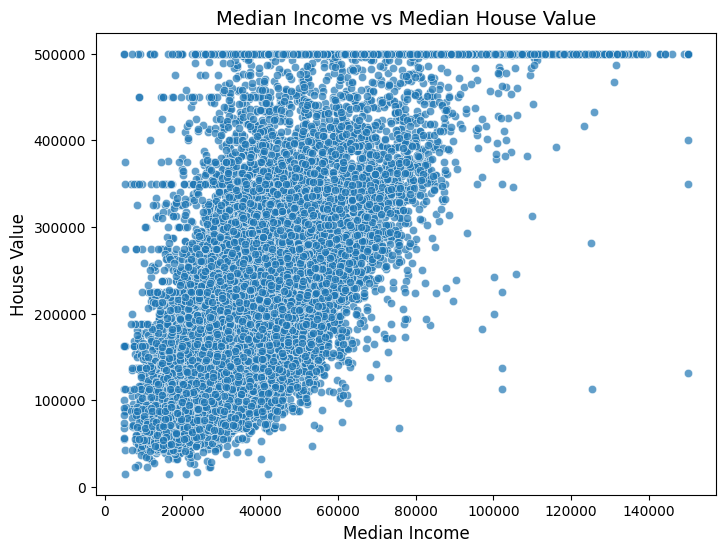

In [23]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x='median_income', y='median_house_value', alpha=0.7, palette='Set2')
plt.title('Median Income vs Median House Value', fontsize=14)
plt.xlabel('Median Income', fontsize=12)
plt.ylabel('House Value', fontsize=12)
plt.show()

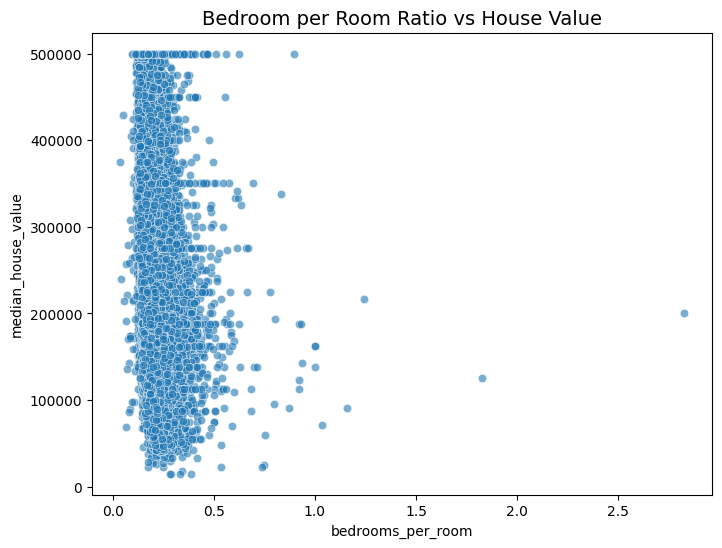

In [24]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x='bedrooms_per_room', y='median_house_value', alpha=0.6, palette='Paired')
plt.title('Bedroom per Room Ratio vs House Value', fontsize=14)
plt.show()

# Dropping Features that are highly correlated and irrelevant to the model

In [25]:
data = data.drop(columns=['total_bedrooms','total_rooms','population',
                    'ocean_proximity_ISLAND','population_per_household','households'])

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  float64
 3   median_income               20640 non-null  float64
 4   median_house_value          20640 non-null  float64
 5   ocean_proximity_INLAND      20640 non-null  int64  
 6   ocean_proximity_NEAR BAY    20640 non-null  int64  
 7   ocean_proximity_NEAR OCEAN  20640 non-null  int64  
 8   rooms_per_household         20640 non-null  float64
 9   bedrooms_per_room           20640 non-null  float64
dtypes: float64(7), int64(3)
memory usage: 1.6 MB


### Saving the updated dataset into a new csv file

In [27]:
data.to_csv('housing_updated.csv',index=False)

# Model Development

In [28]:
x = data.drop("median_house_value", axis=1)
y=data['median_house_value']

### split data into training and test set

In [29]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.20, random_state=42
)

# Scaling the data 

In [30]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

### Linear Regression Model

In [31]:
LR=LinearRegression()
LR.fit(x_train_scaled,y_train)

LinearRegression()

In [32]:
y_pred_LR=LR.predict(x_test_scaled)
mae = mean_absolute_error(y_test, y_pred_LR)
mse = mean_squared_error(y_test, y_pred_LR)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_LR)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 53234.36271407152
Mean Squared Error (MSE): 5869595992.374857
Root Mean Squared Error (RMSE): 76613.2886148014
R² Score: 0.5520790768501728


### Checking for the linearity by plot

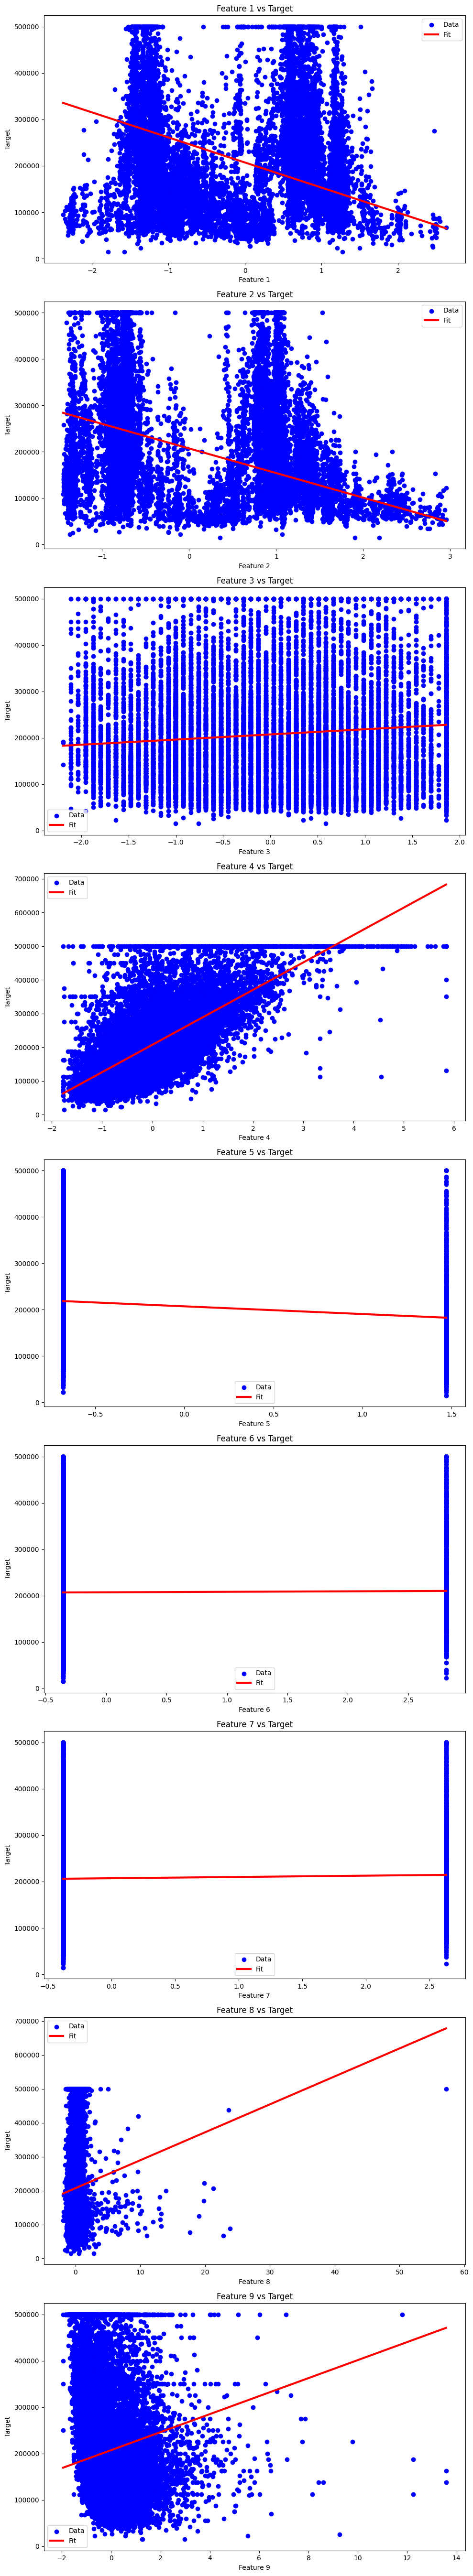

In [33]:
# Number of features in x_train
n_features = x_train_scaled.shape[1]

# Set up subplots for each feature
fig, axes = plt.subplots(n_features, 1, figsize=(10, 6 * n_features))

# Iterate over each feature for plotting
for i in range(n_features):
    # Scatter plot for actual data (using the current feature i)
    axes[i].scatter(x_train_scaled[:, i], y_train, label='Data', color='blue')

    # Create X values for prediction: fix other features to mean (or any constant value)
    x_pred = np.tile(np.linspace(x_train_scaled[:, i].min(), x_train_scaled[:, i].max(), 100), (n_features, 1)).T  # Tile the array to match 9 features
    x_pred[:, [j for j in range(n_features) if j != i]] = np.mean(x_train_scaled, axis=0)[[j for j in range(n_features) if j != i]]  # Fix other features to mean

    # Make predictions using the trained model
    y_pred = LR.predict(x_pred)

    # Plot the regression line
    axes[i].plot(x_pred[:, i], y_pred, label='Fit', color='red', linewidth=3)
    
    # Set labels and title
    axes[i].set_title(f'Feature {i + 1} vs Target')
    axes[i].set_xlabel(f'Feature {i + 1}')
    axes[i].set_ylabel('Target')
    axes[i].legend()

# Show the plot
plt.tight_layout()
plt.show()

#The plot above shows that median_income & bedrooms per room shows the strongest linear relationship with median house value while latitude showed a weak linear trend and all ocean proximity categories,RoomsPerHousehold,longitude,house_median_age has no linear relationship with median house value 

## Random Forest Model

In [34]:
RF=RandomForestRegressor(n_estimators=100,random_state=42)

RF.fit(x_train_scaled,y_train)


y_pred_RF=RF.predict(x_test_scaled)
mae = mean_absolute_error(y_test, y_pred_RF)
mse = mean_squared_error(y_test, y_pred_RF)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_RF)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 31969.577921511627
Mean Squared Error (MSE): 2462970359.065297
Root Mean Squared Error (RMSE): 49628.322146384286
R² Score: 0.8120456742923418


## Support Vector Regression(SVR)

In [35]:
svr=SVR(C=1, epsilon=0.1, kernel='poly')
svr.fit(x_train_scaled,y_train)

y_pred_svr=svr.predict(x_test_scaled)
mae = mean_absolute_error(y_test, y_pred_svr)
mse = mean_squared_error(y_test, y_pred_svr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_svr)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 86814.22858489635
Mean Squared Error (MSE): 13548589465.63086
Root Mean Squared Error (RMSE): 116398.40834663874
R² Score: -0.03392068358830702


## Gradient boosting(XGBoost) Model

In [36]:
xgb=xgb.XGBRegressor('reg:squarederror', n_estimators=100, random_state=42)
xgb.fit(x_train_scaled,y_train)
y_pred_xgb=xgb.predict(x_test_scaled)

mae = mean_absolute_error(y_test, y_pred_xgb)
mse = mean_squared_error(y_test, y_pred_xgb)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_xgb)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 32676.22271823144
Mean Squared Error (MSE): 2567976293.272762
Root Mean Squared Error (RMSE): 50675.203929266645
R² Score: 0.8040324558276434


### Gradient Boosting(LightGBM) Model

In [37]:
lgb=Igb.LGBMRegressor(n_estimators=100, random_state=42)
lgb.fit(x_train_scaled,y_train)

y_pred_lgb=lgb.predict(x_test_scaled)

mae = mean_absolute_error(y_test, y_pred_lgb)
mse = mean_squared_error(y_test, y_pred_lgb)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_lgb)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001546 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 9
[LightGBM] [Info] Start training from score 207194.693738
Mean Absolute Error (MAE): 32723.48900604017
Mean Squared Error (MSE): 2352817229.9137874
Root Mean Squared Error (RMSE): 48505.847378576815
R² Score: 0.8204516857727713


## Neural Net Model

In [38]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='Train Loss (MSE)')
    plt.plot(history.history['val_loss'], label='Val Loss (MSE)')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training vs Validation Loss')
    plt.show()

def plot_mae(history):
    plt.plot(history.history['mae'], label='Train MAE')
    plt.plot(history.history['val_mae'], label='Val MAE')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Absolute Error')
    plt.legend()
    plt.title('Training vs Validation MAE')
    plt.show()

In [39]:
def train_model(x_train_scaled, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(x_train_scaled.shape[1],)),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1, activation='linear')  # Regression output
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
        loss='mse',
        metrics=['mae']  # Mean Absolute Error
    )

    history = model.fit(
        x_train_scaled, y_train,
        validation_split=0.2,  # Uses part of the training data for validation
        epochs=epochs,
        batch_size=batch_size,
        verbose=0
    )

    return model, history

16 nodes, dropout 0, lr 0.01, batch_size 32


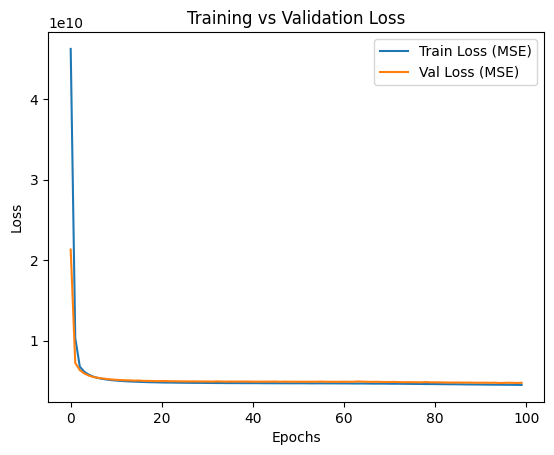

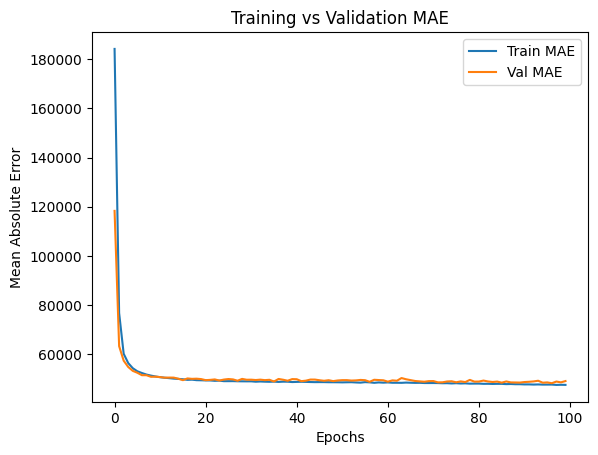

16 nodes, dropout 0, lr 0.01, batch_size 64


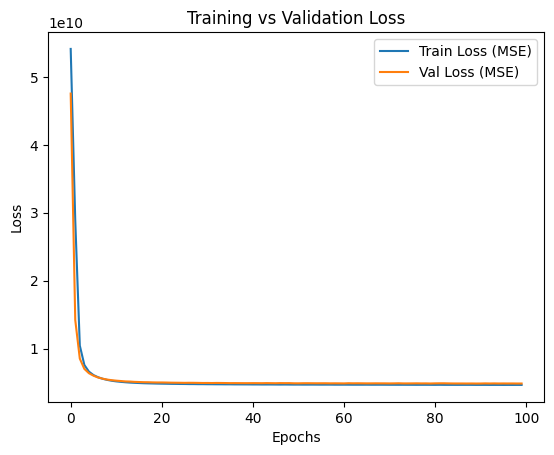

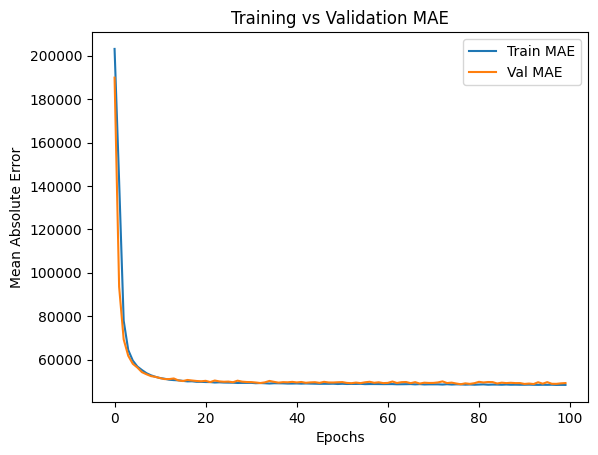

16 nodes, dropout 0, lr 0.01, batch_size 128


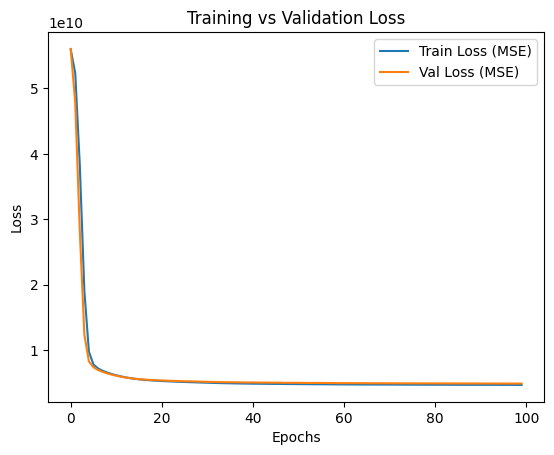

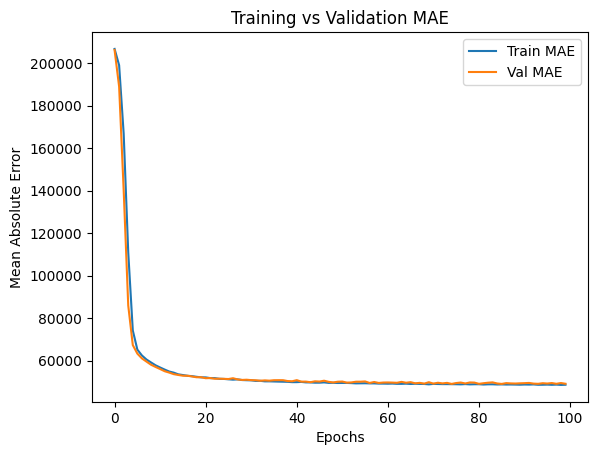

16 nodes, dropout 0, lr 0.005, batch_size 32


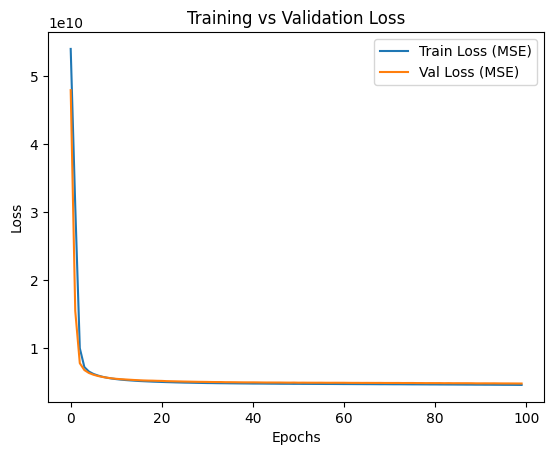

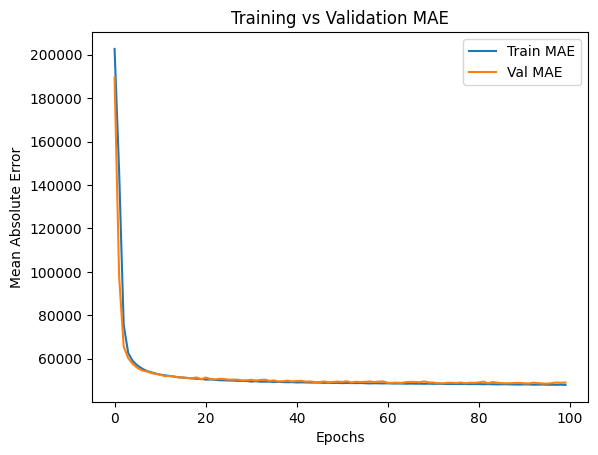

16 nodes, dropout 0, lr 0.005, batch_size 64


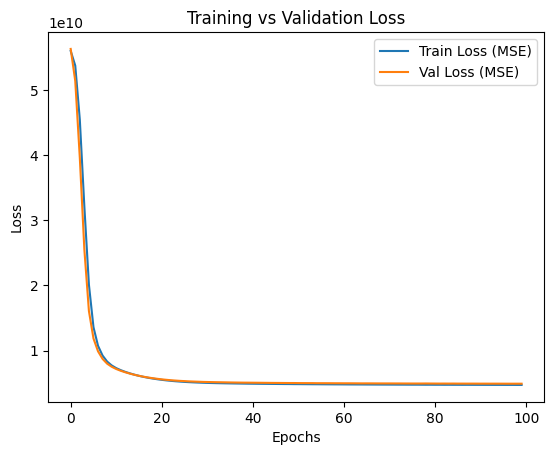

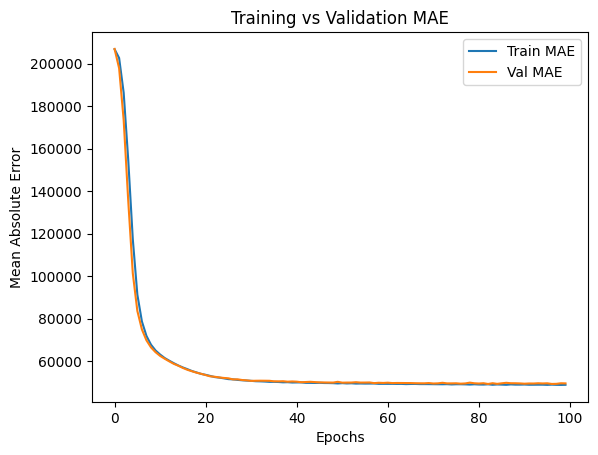

16 nodes, dropout 0, lr 0.005, batch_size 128


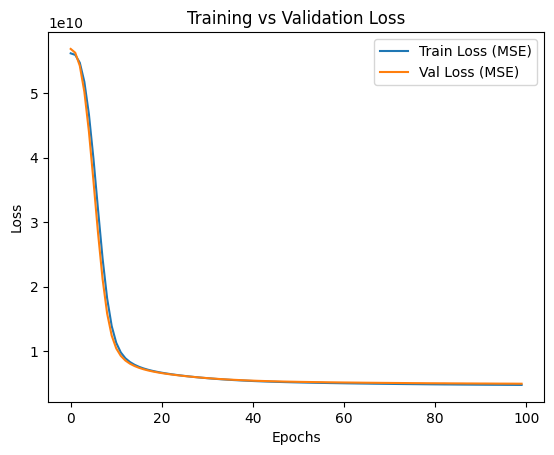

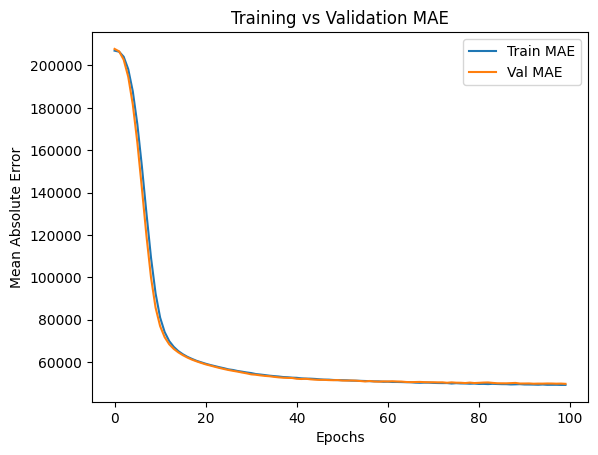

16 nodes, dropout 0, lr 0.001, batch_size 32


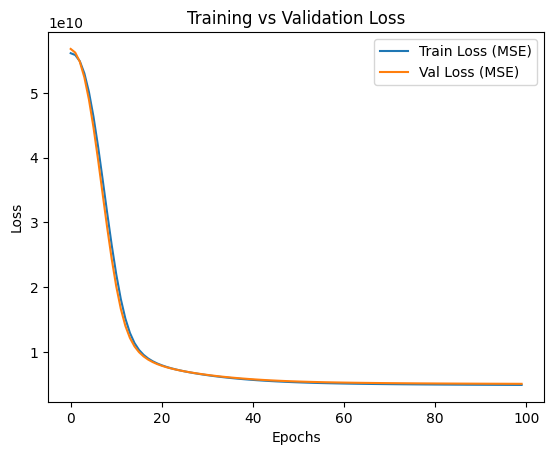

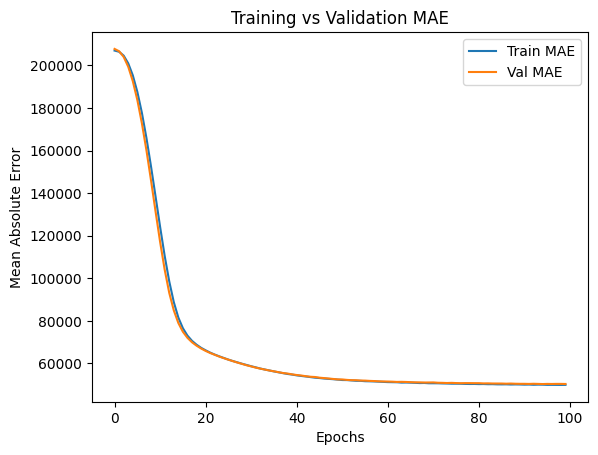

16 nodes, dropout 0, lr 0.001, batch_size 64


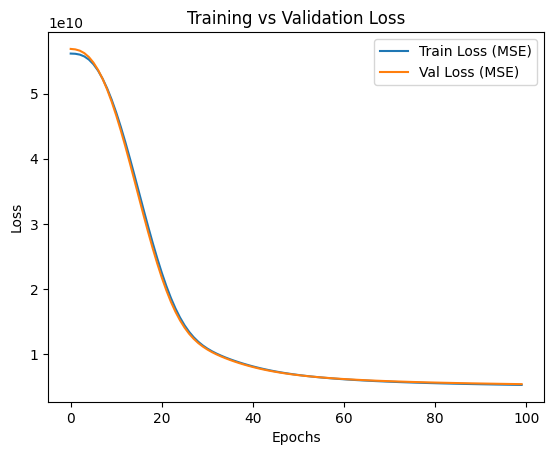

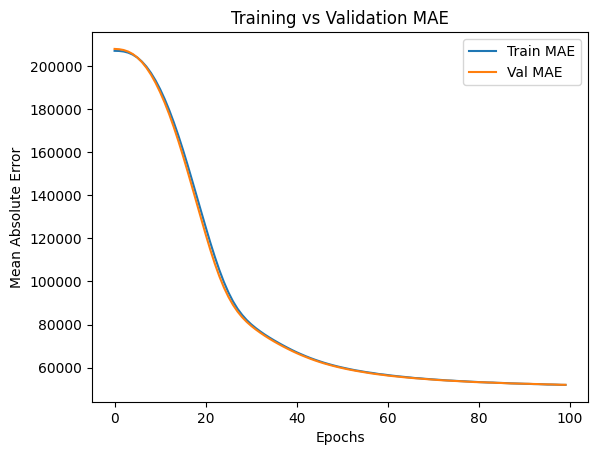

16 nodes, dropout 0, lr 0.001, batch_size 128


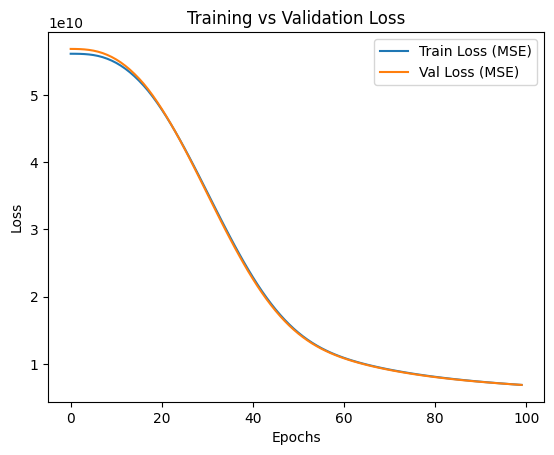

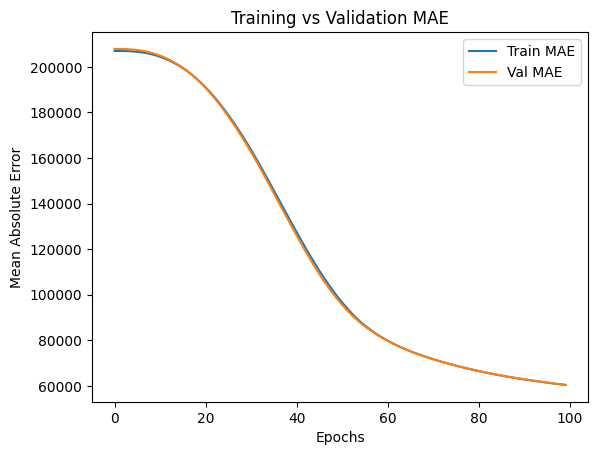

16 nodes, dropout 0.2, lr 0.01, batch_size 32


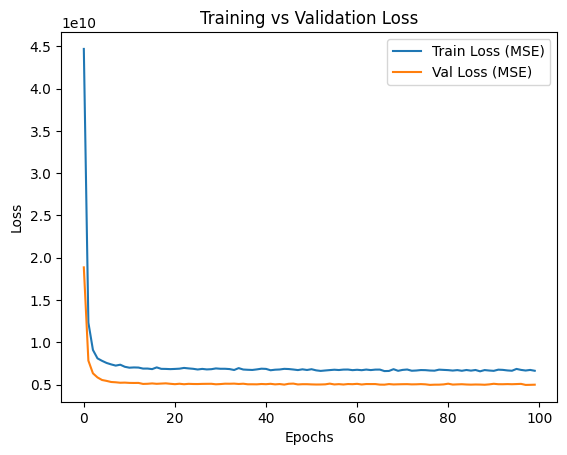

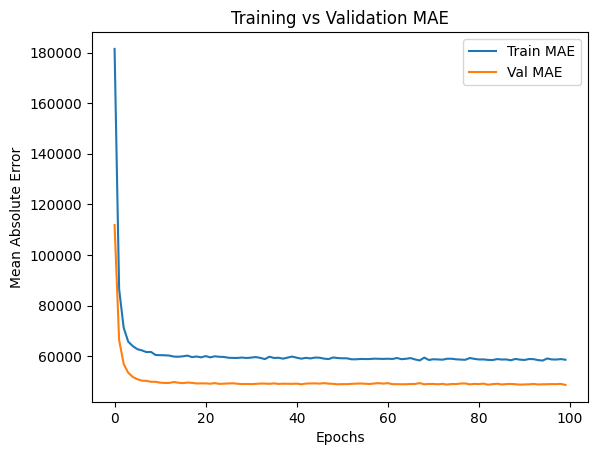

16 nodes, dropout 0.2, lr 0.01, batch_size 64


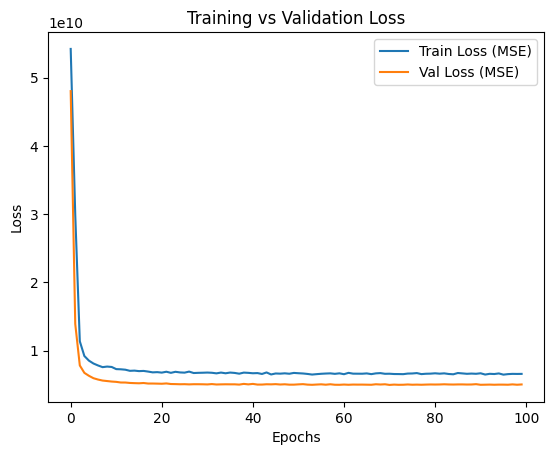

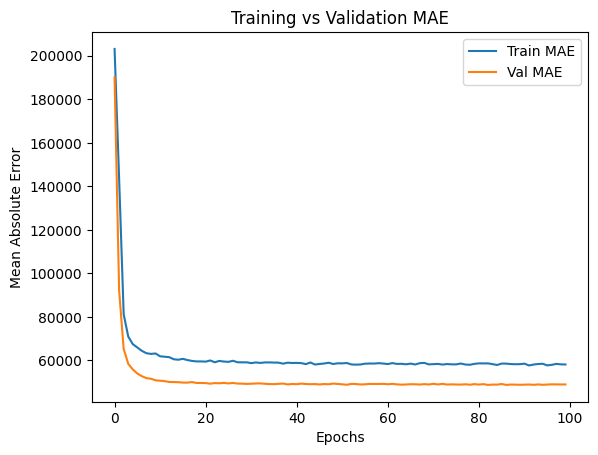

16 nodes, dropout 0.2, lr 0.01, batch_size 128


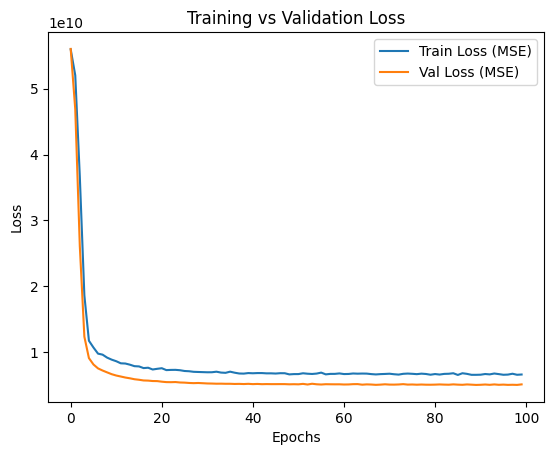

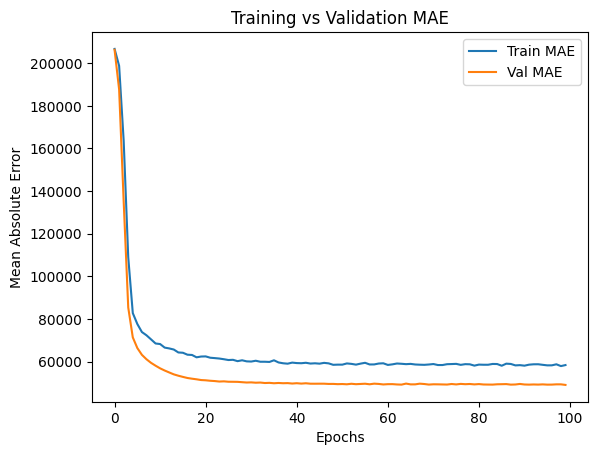

16 nodes, dropout 0.2, lr 0.005, batch_size 32


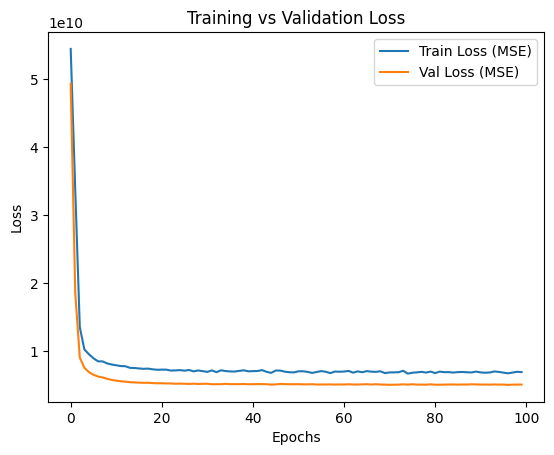

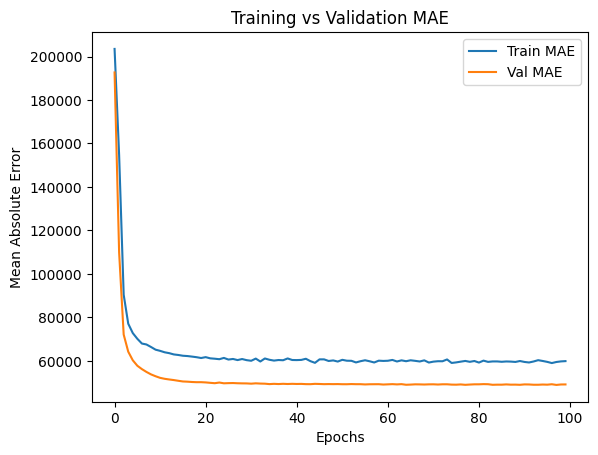

16 nodes, dropout 0.2, lr 0.005, batch_size 64


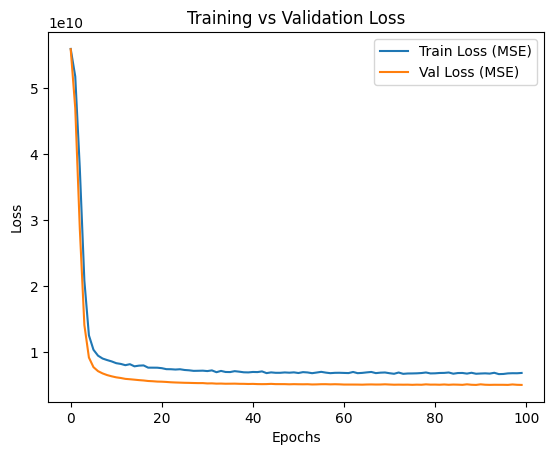

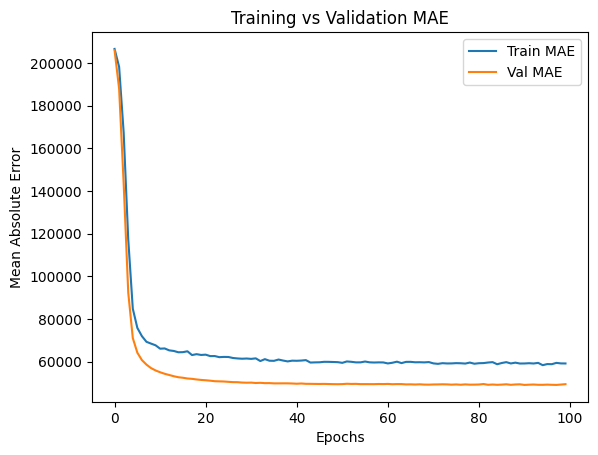

16 nodes, dropout 0.2, lr 0.005, batch_size 128


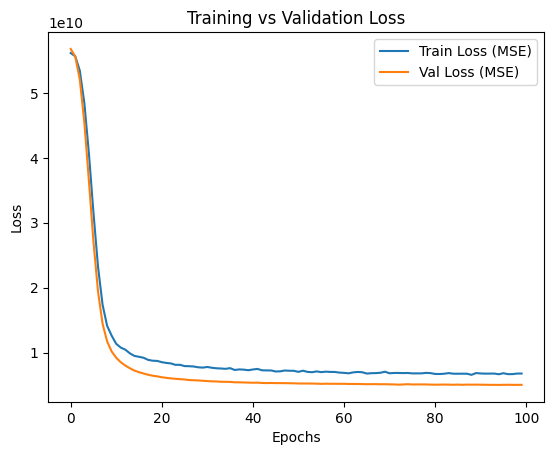

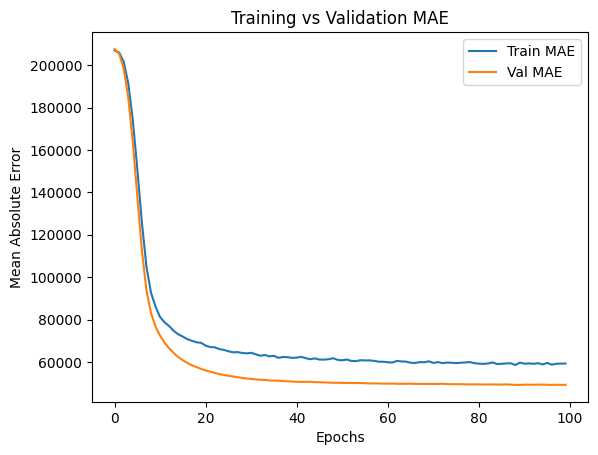

16 nodes, dropout 0.2, lr 0.001, batch_size 32


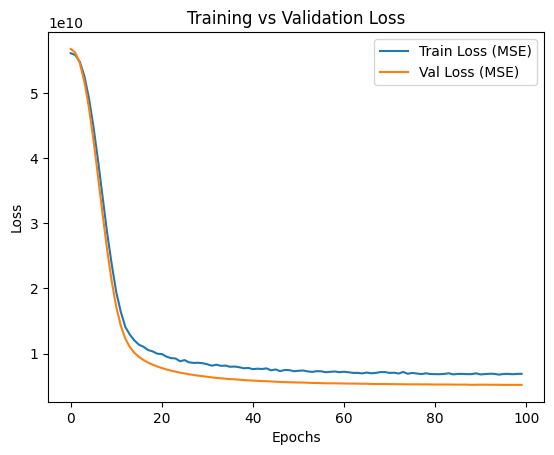

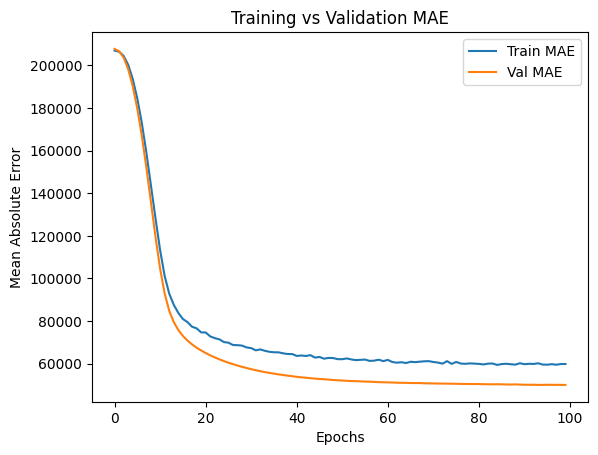

16 nodes, dropout 0.2, lr 0.001, batch_size 64


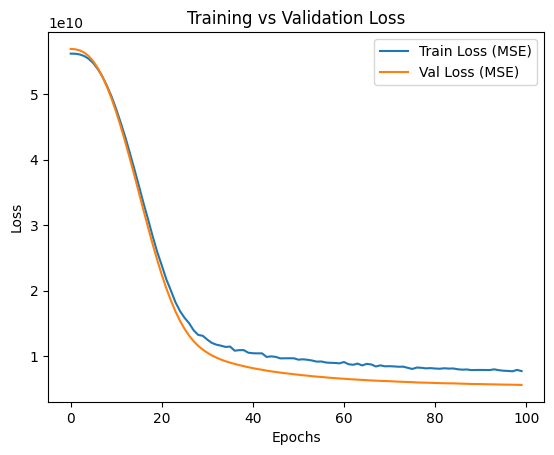

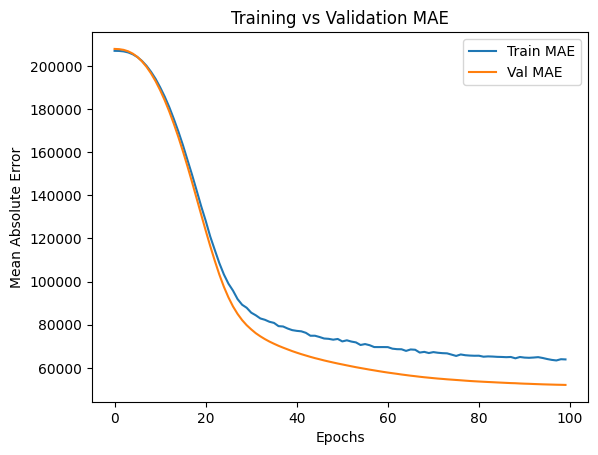

16 nodes, dropout 0.2, lr 0.001, batch_size 128


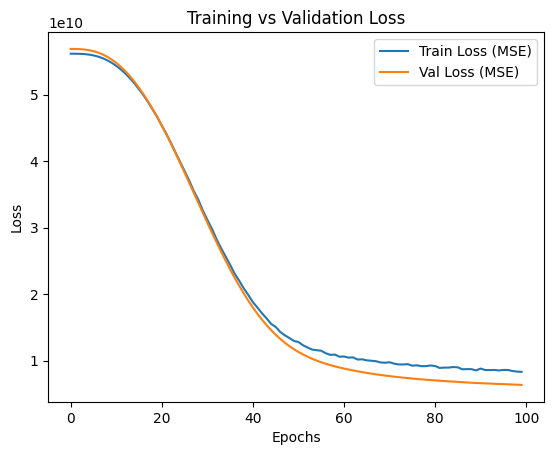

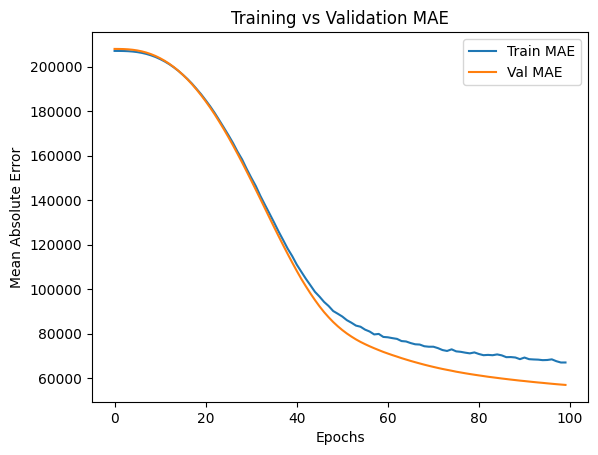

32 nodes, dropout 0, lr 0.01, batch_size 32


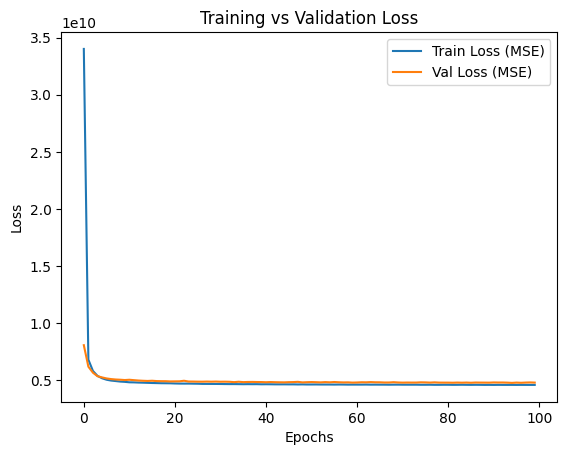

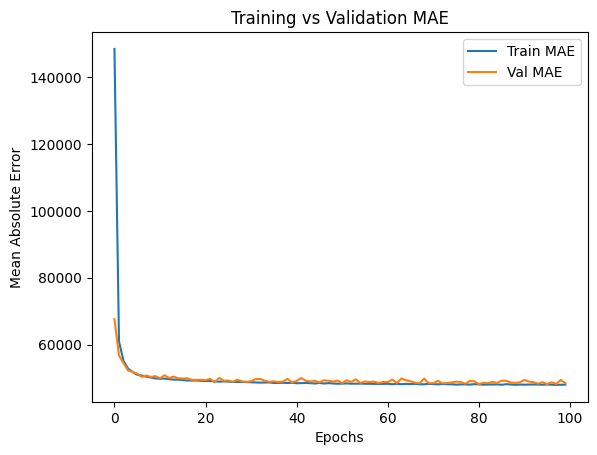

32 nodes, dropout 0, lr 0.01, batch_size 64


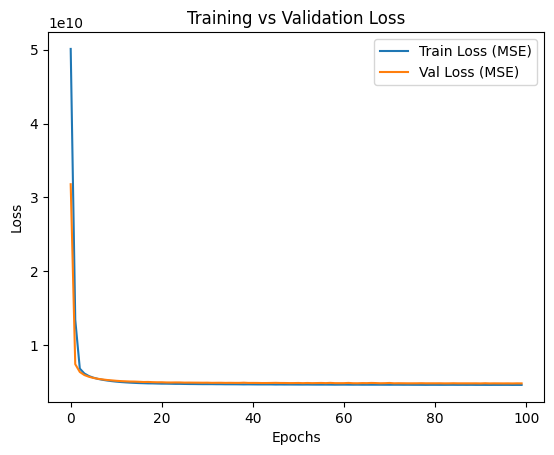

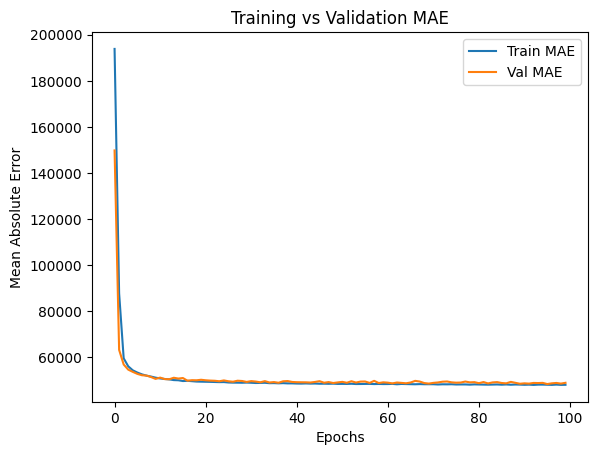

32 nodes, dropout 0, lr 0.01, batch_size 128


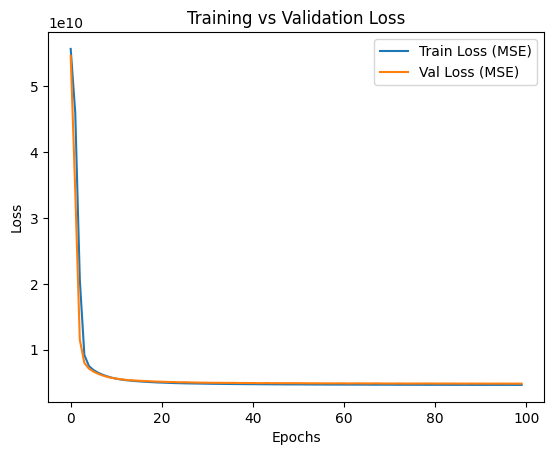

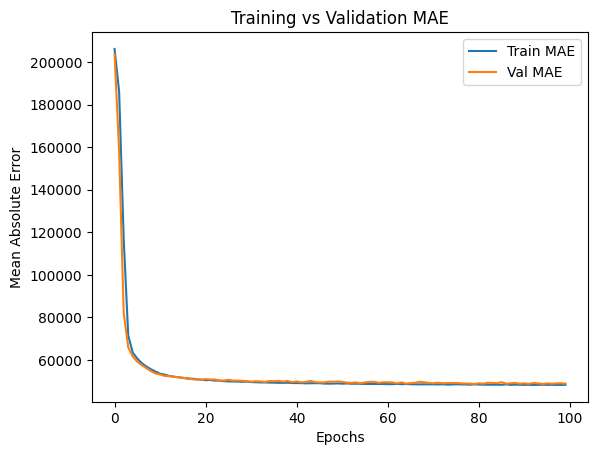

32 nodes, dropout 0, lr 0.005, batch_size 32


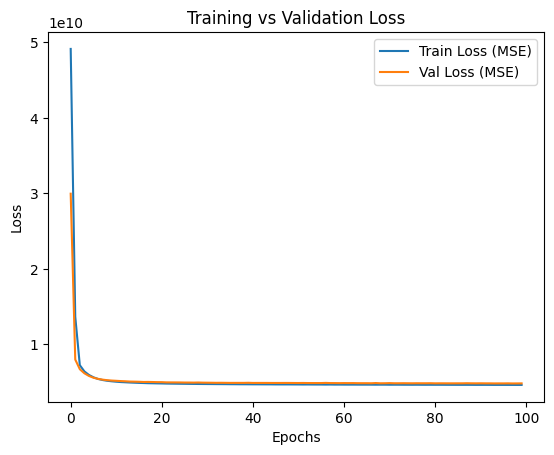

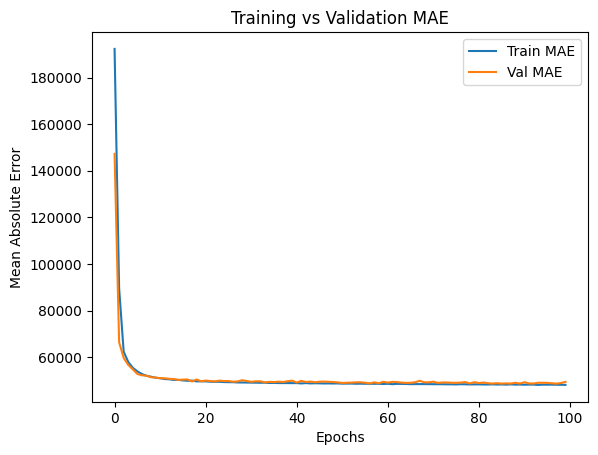

32 nodes, dropout 0, lr 0.005, batch_size 64


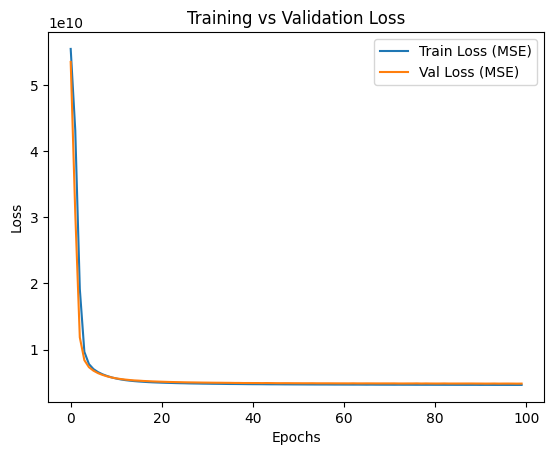

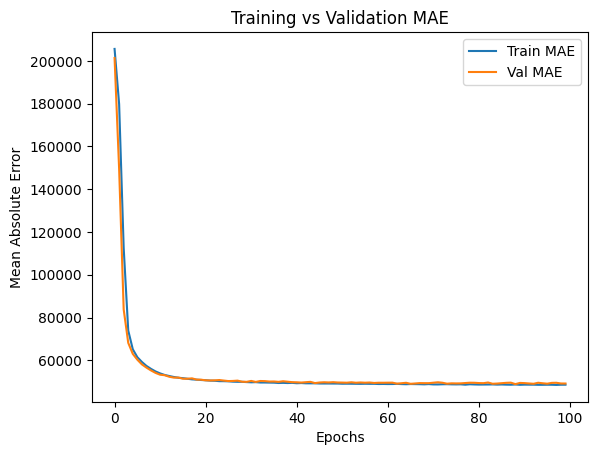

32 nodes, dropout 0, lr 0.005, batch_size 128


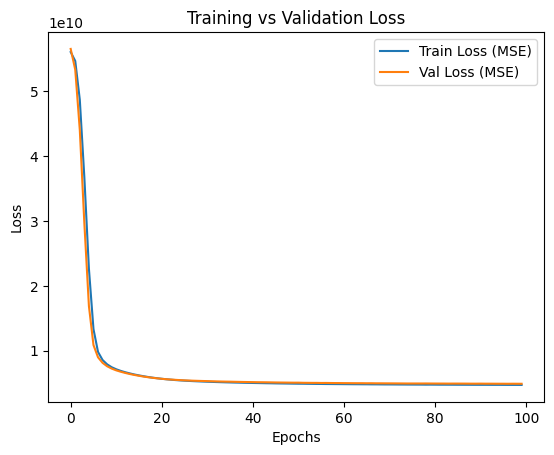

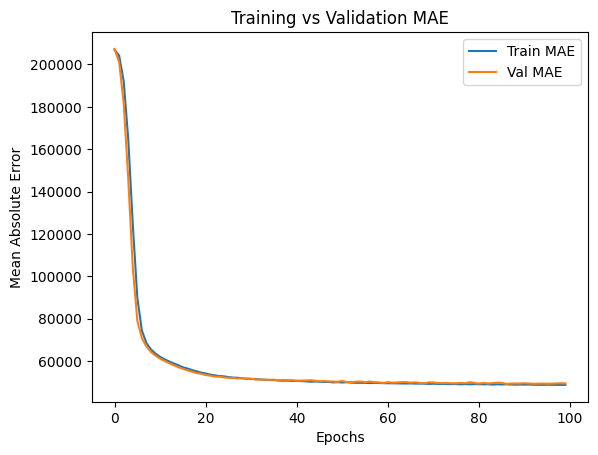

32 nodes, dropout 0, lr 0.001, batch_size 32


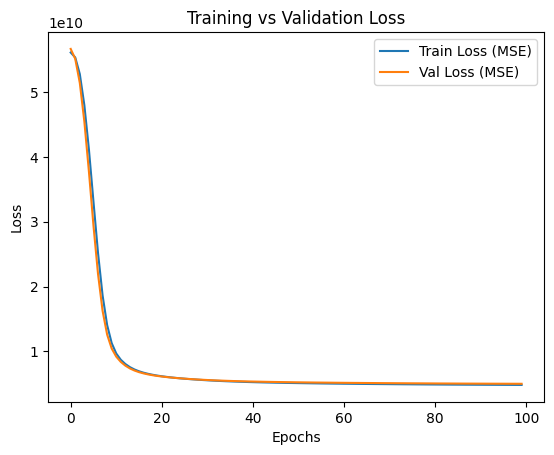

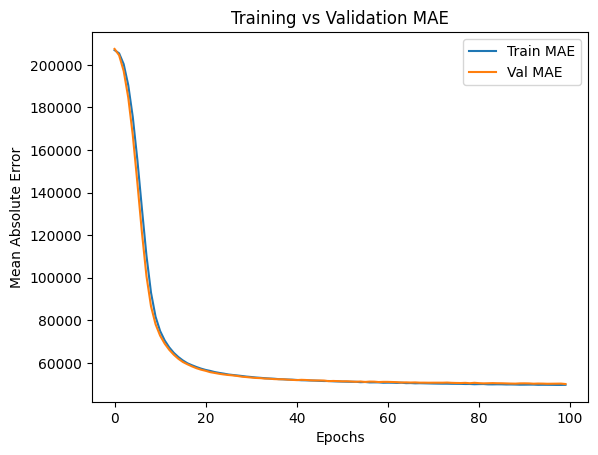

32 nodes, dropout 0, lr 0.001, batch_size 64


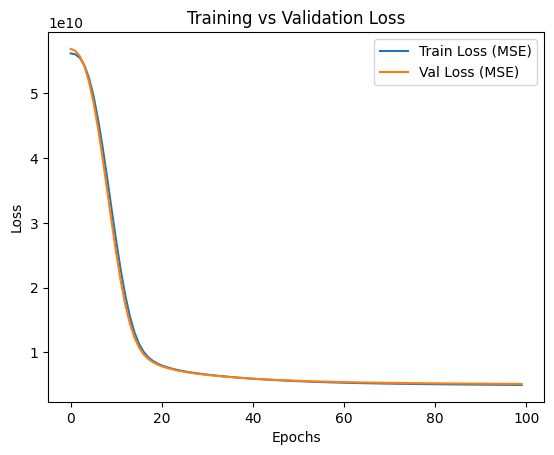

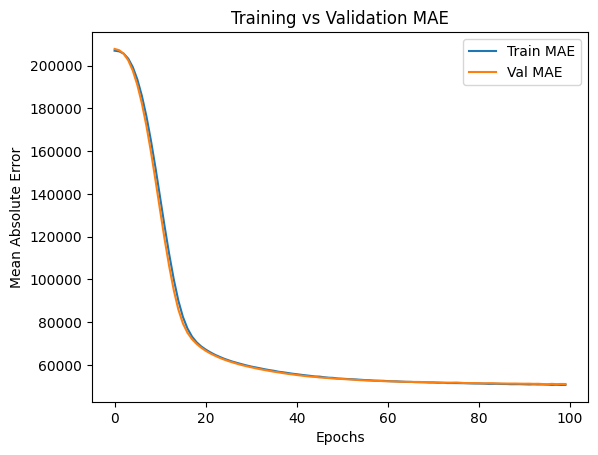

32 nodes, dropout 0, lr 0.001, batch_size 128


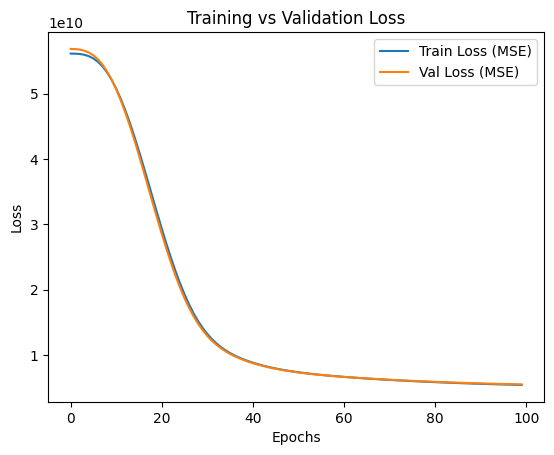

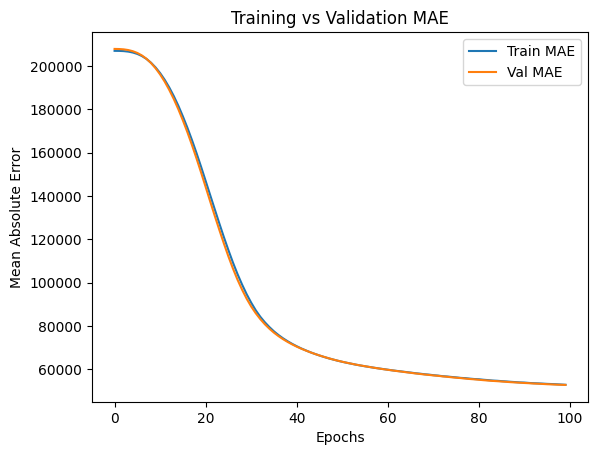

32 nodes, dropout 0.2, lr 0.01, batch_size 32


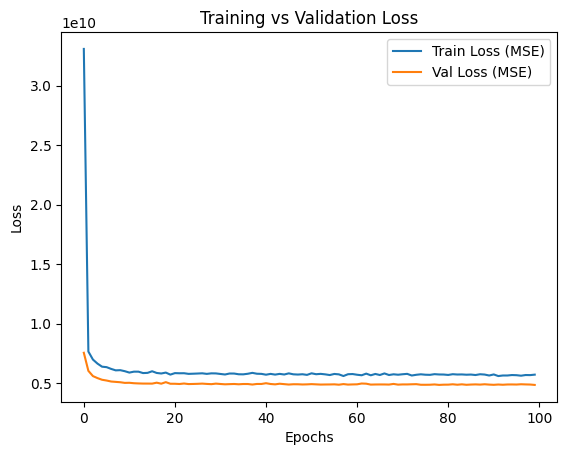

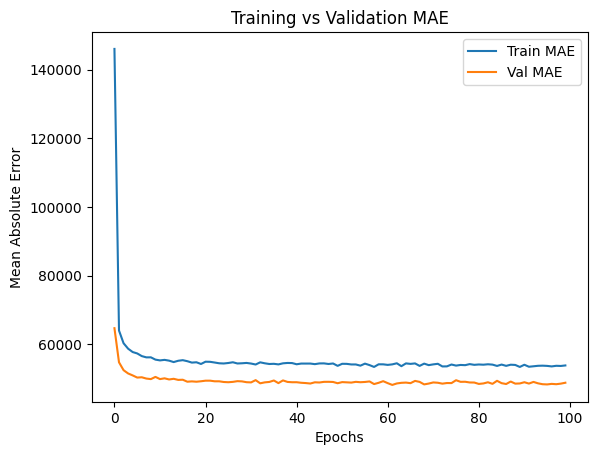

32 nodes, dropout 0.2, lr 0.01, batch_size 64


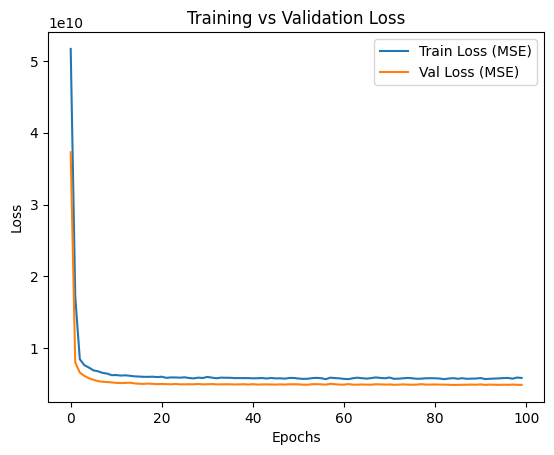

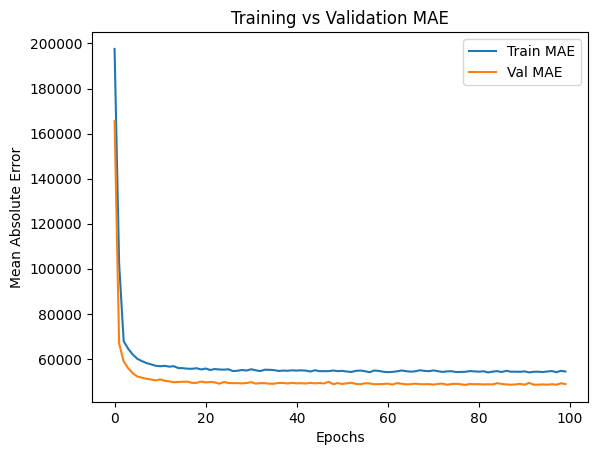

32 nodes, dropout 0.2, lr 0.01, batch_size 128


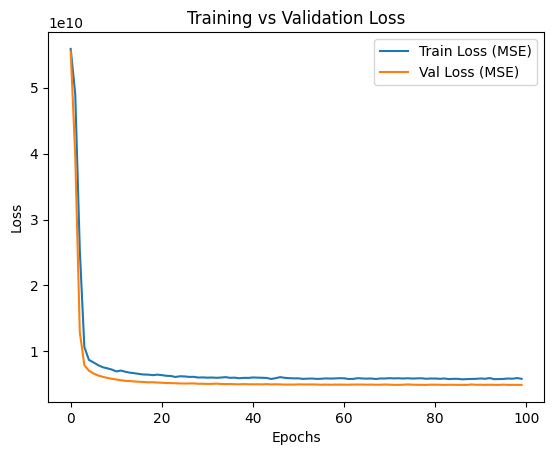

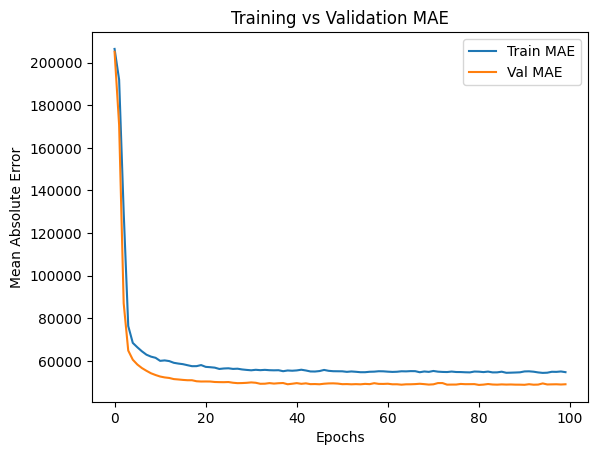

32 nodes, dropout 0.2, lr 0.005, batch_size 32


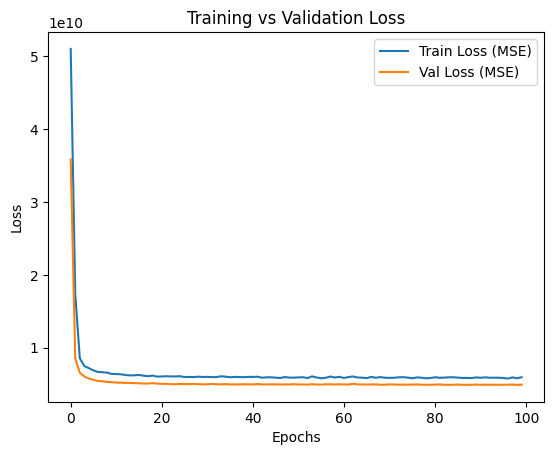

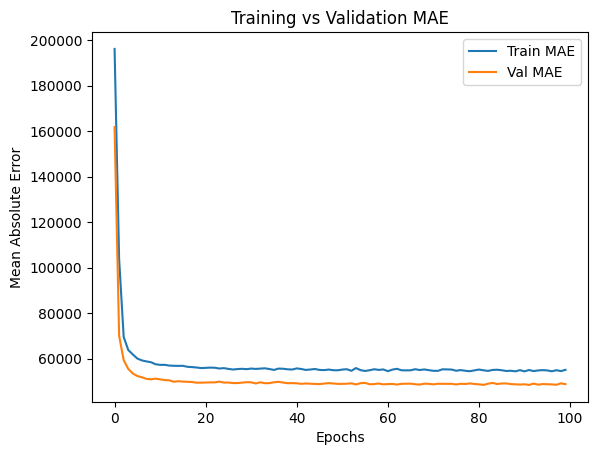

32 nodes, dropout 0.2, lr 0.005, batch_size 64


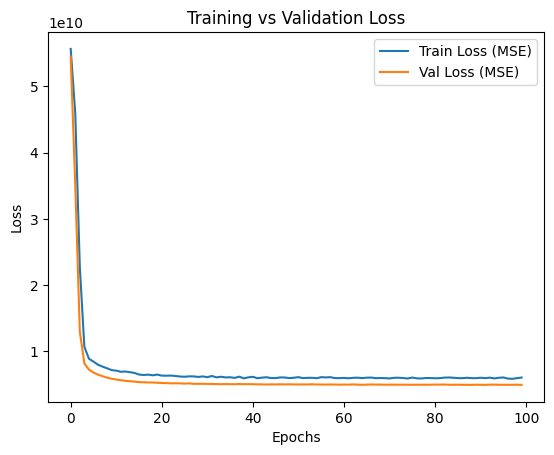

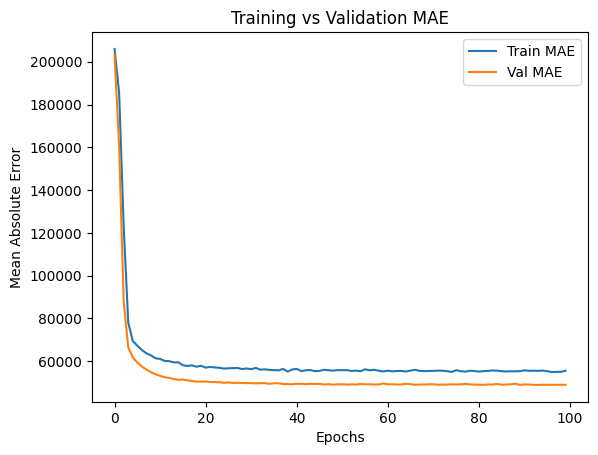

32 nodes, dropout 0.2, lr 0.005, batch_size 128


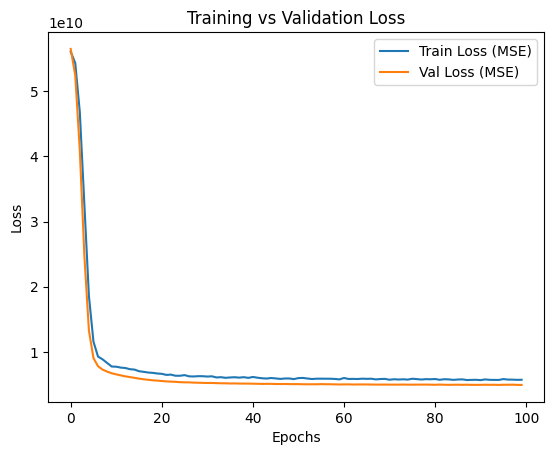

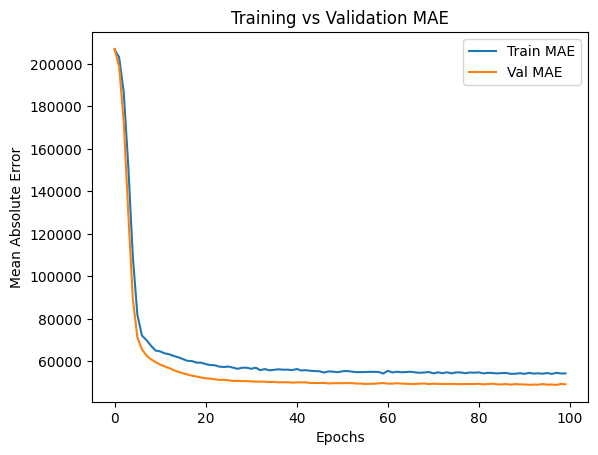

32 nodes, dropout 0.2, lr 0.001, batch_size 32


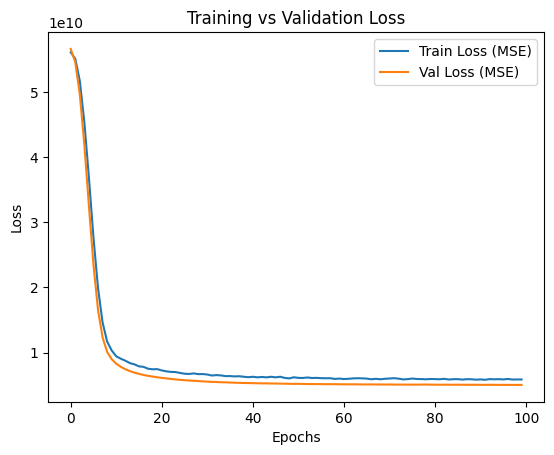

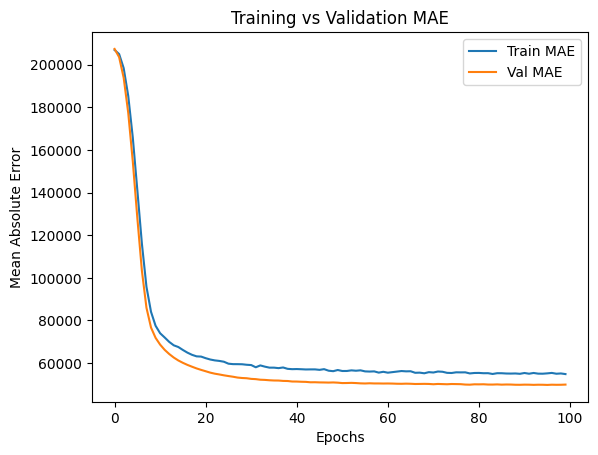

32 nodes, dropout 0.2, lr 0.001, batch_size 64


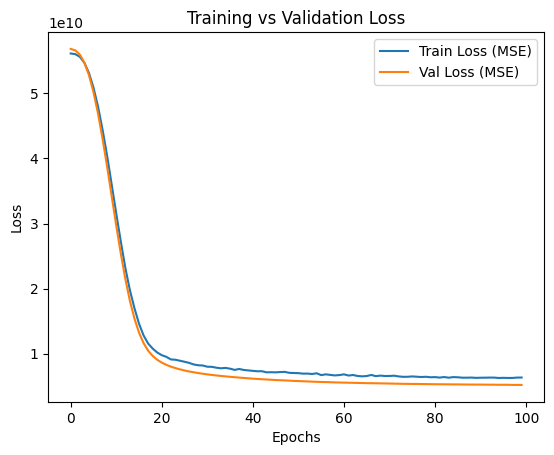

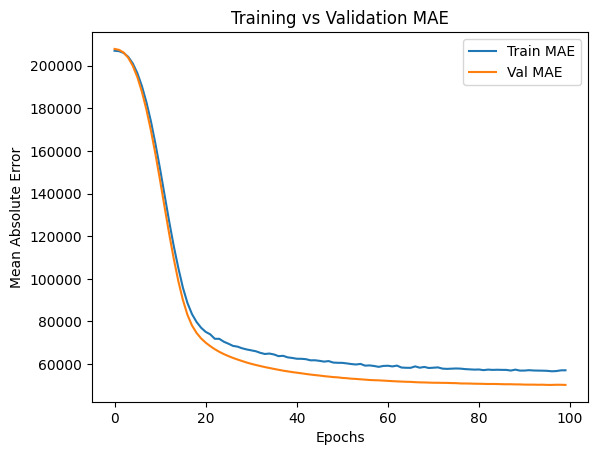

32 nodes, dropout 0.2, lr 0.001, batch_size 128


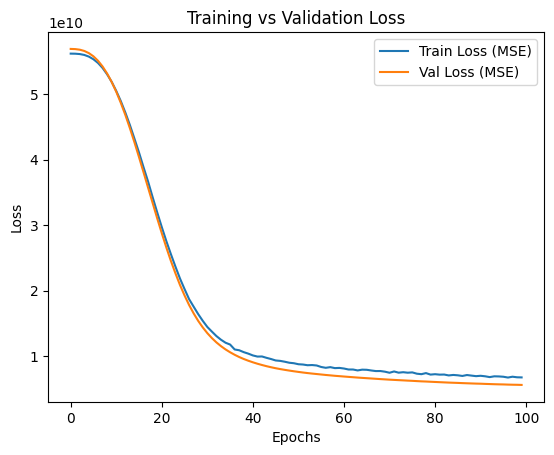

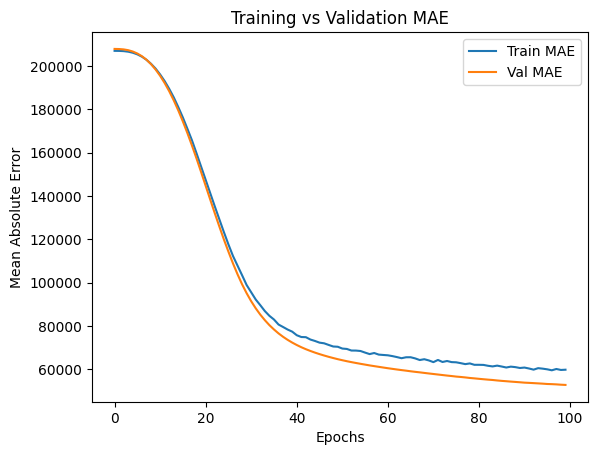

64 nodes, dropout 0, lr 0.01, batch_size 32


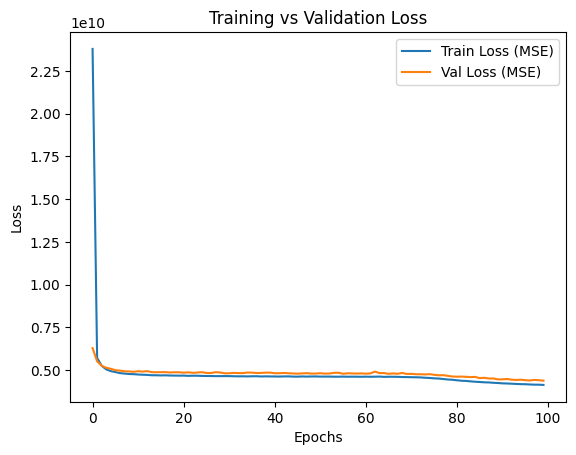

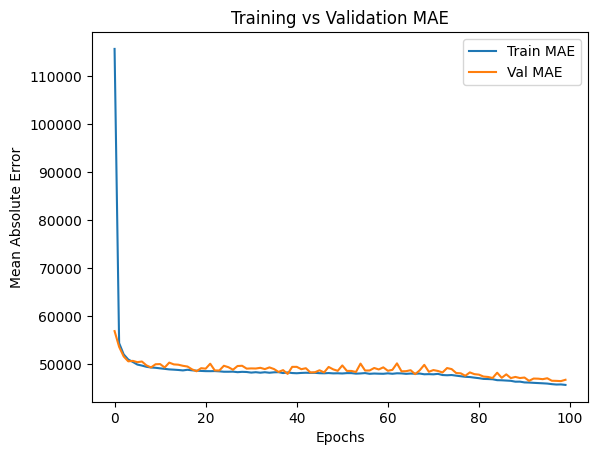

64 nodes, dropout 0, lr 0.01, batch_size 64


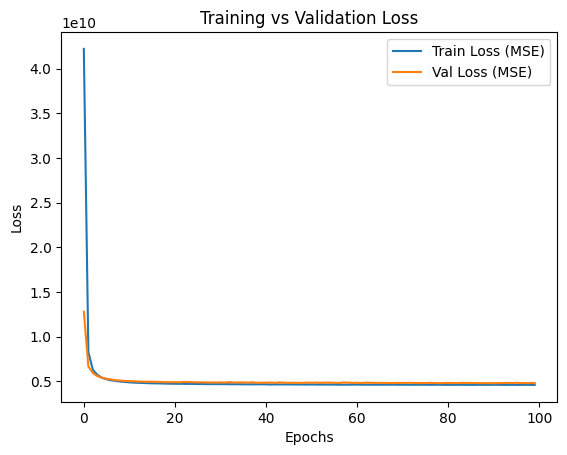

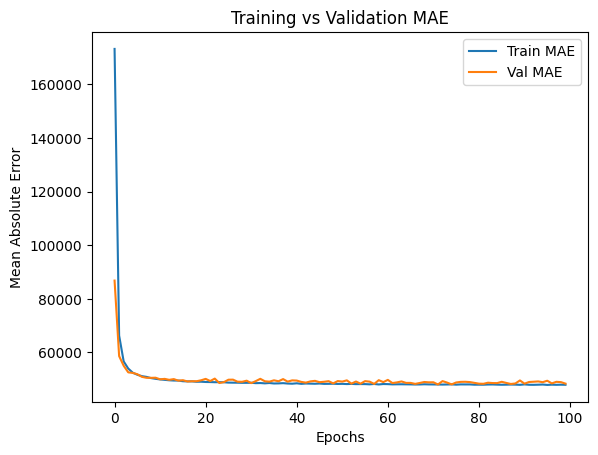

64 nodes, dropout 0, lr 0.01, batch_size 128


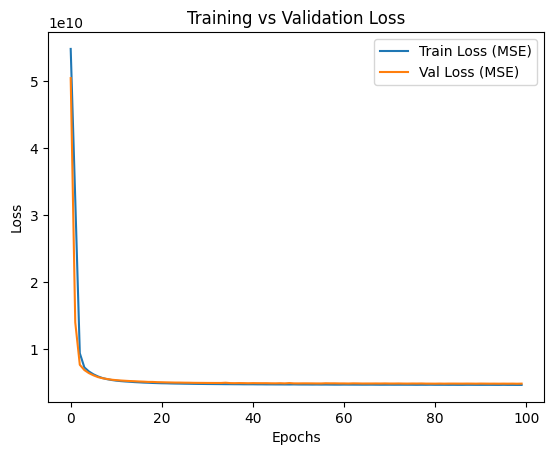

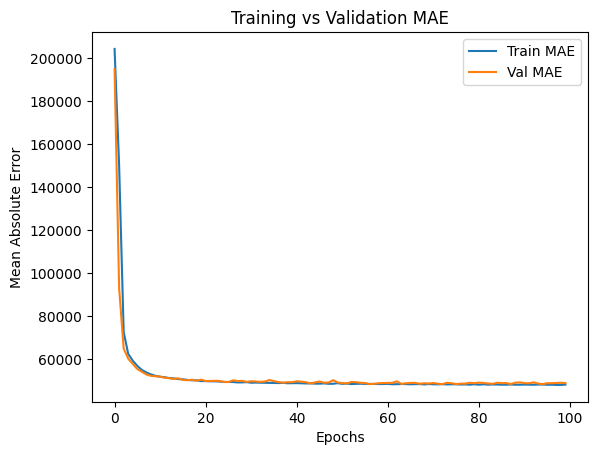

64 nodes, dropout 0, lr 0.005, batch_size 32


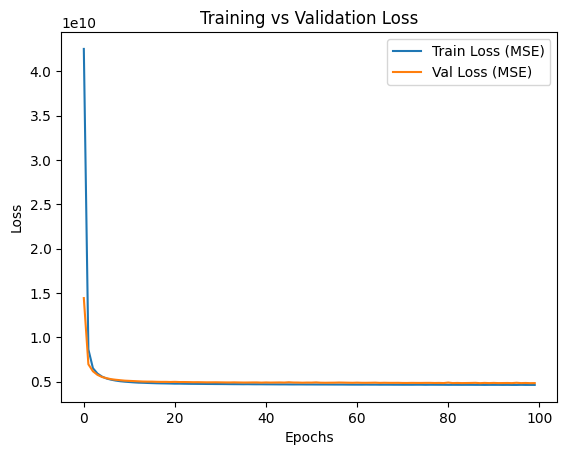

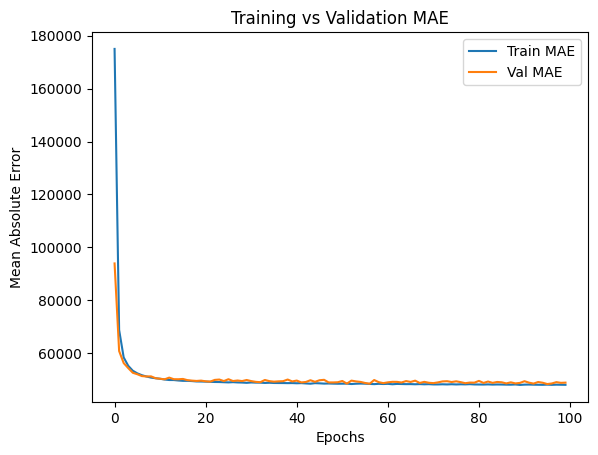

64 nodes, dropout 0, lr 0.005, batch_size 64


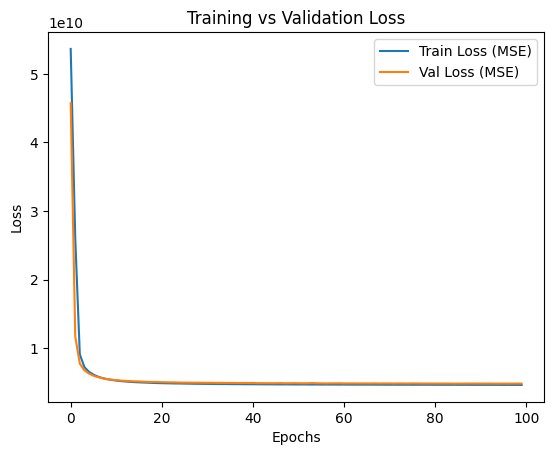

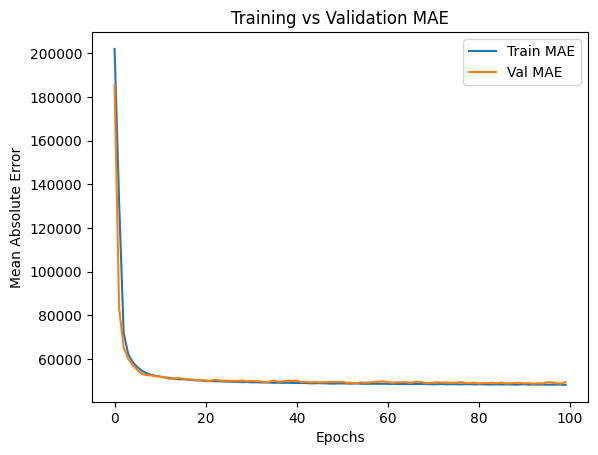

64 nodes, dropout 0, lr 0.005, batch_size 128


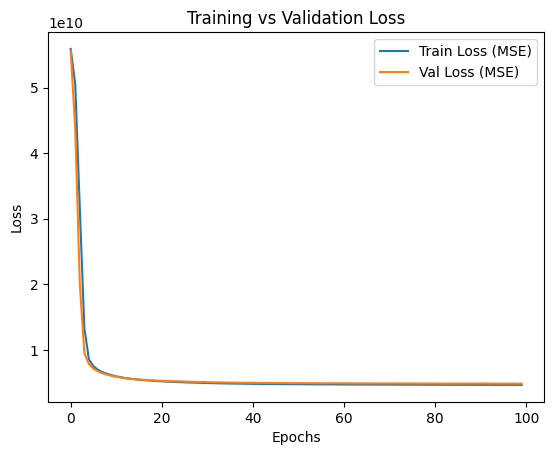

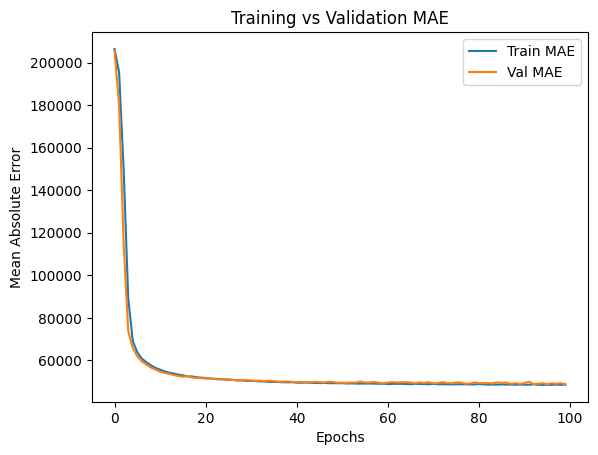

64 nodes, dropout 0, lr 0.001, batch_size 32


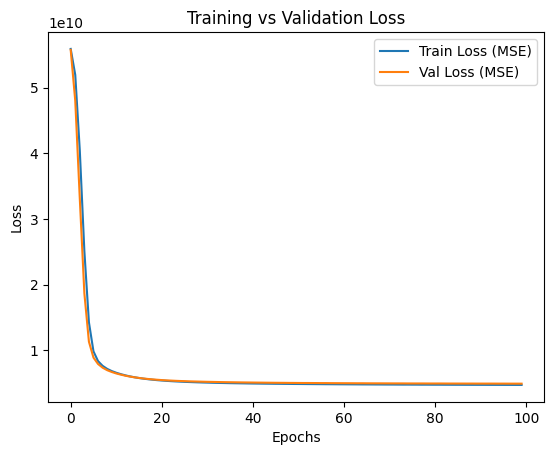

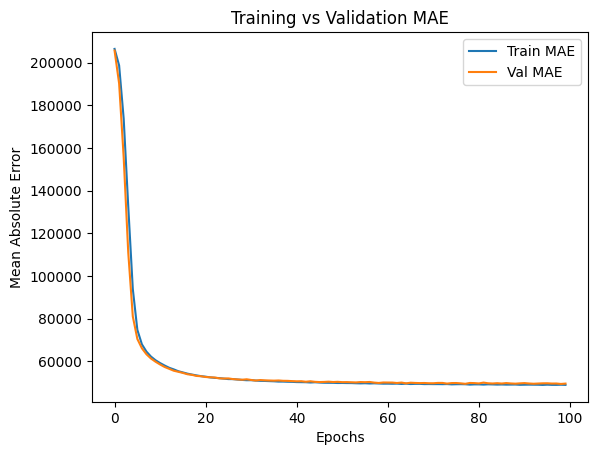

64 nodes, dropout 0, lr 0.001, batch_size 64


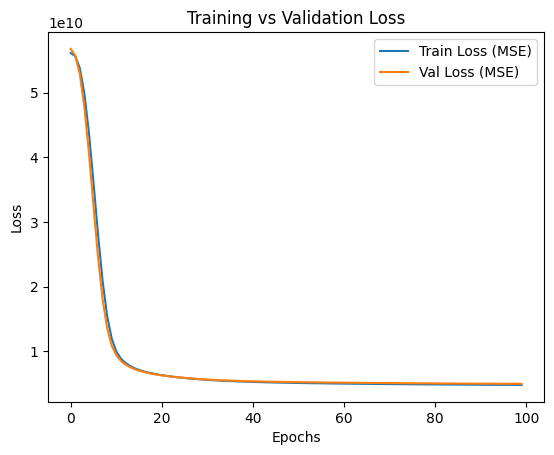

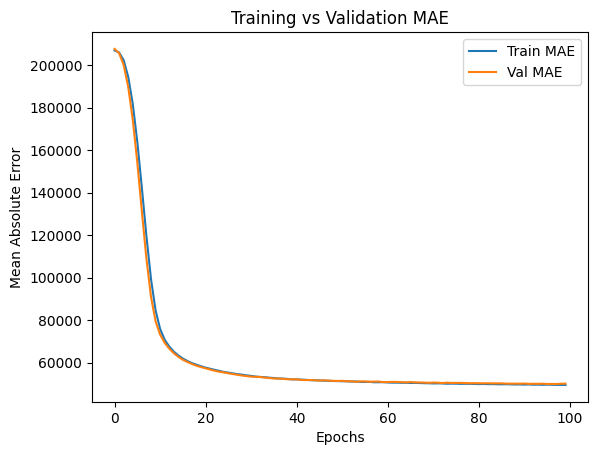

64 nodes, dropout 0, lr 0.001, batch_size 128


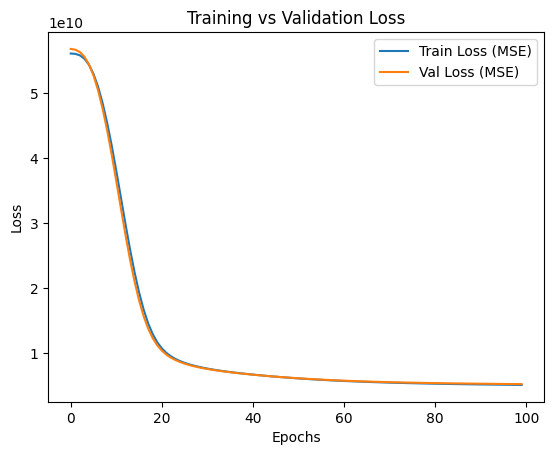

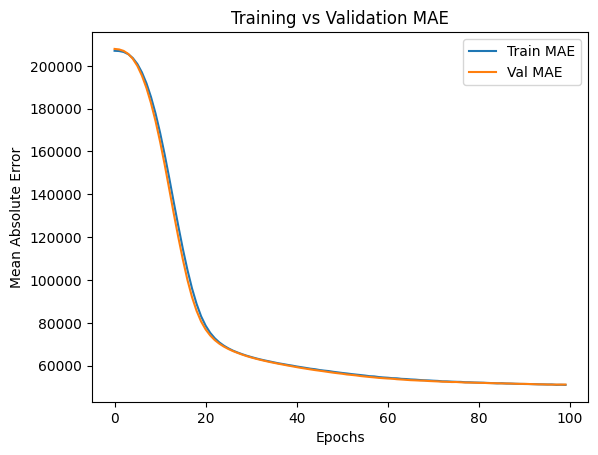

64 nodes, dropout 0.2, lr 0.01, batch_size 32


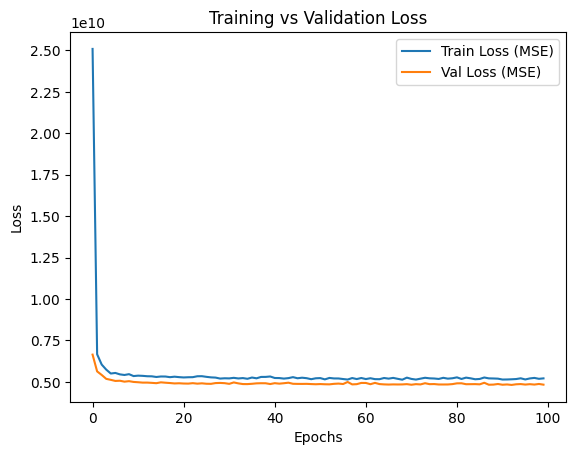

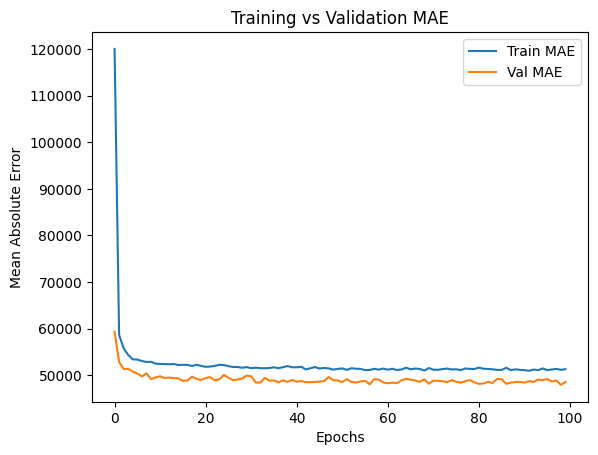

64 nodes, dropout 0.2, lr 0.01, batch_size 64


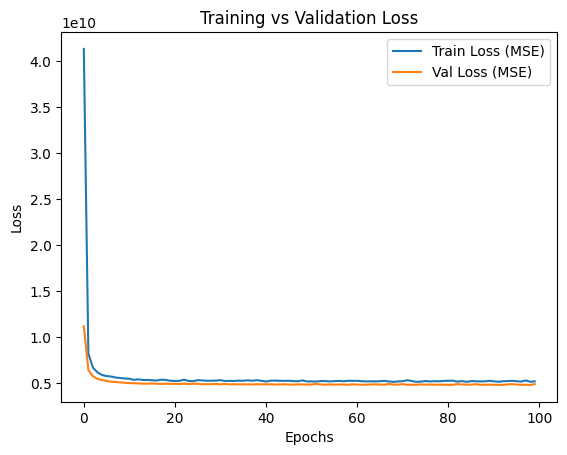

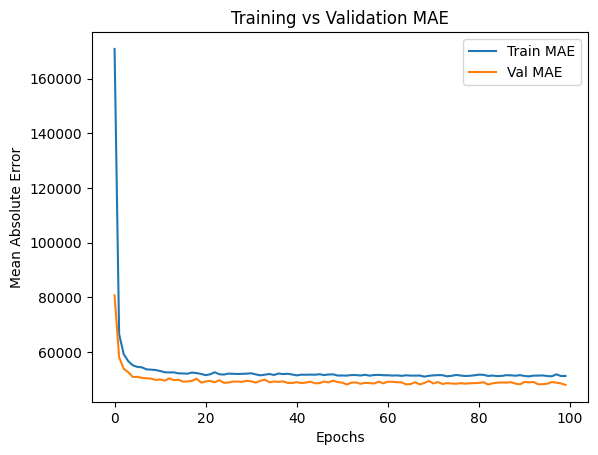

64 nodes, dropout 0.2, lr 0.01, batch_size 128


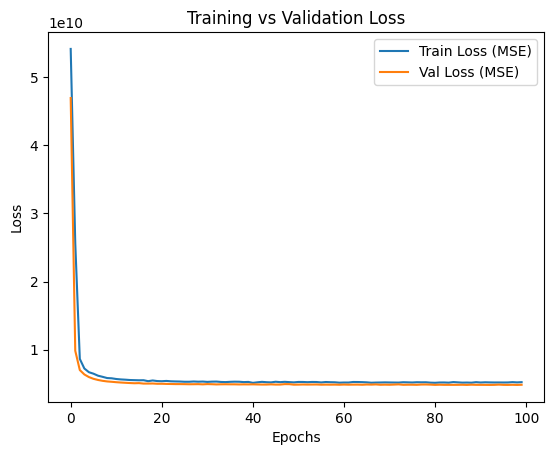

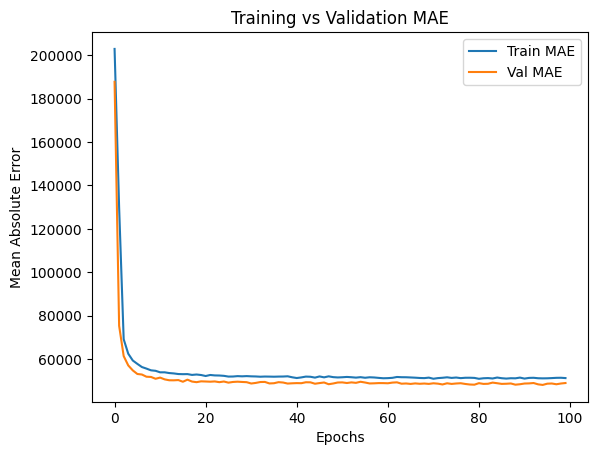

64 nodes, dropout 0.2, lr 0.005, batch_size 32


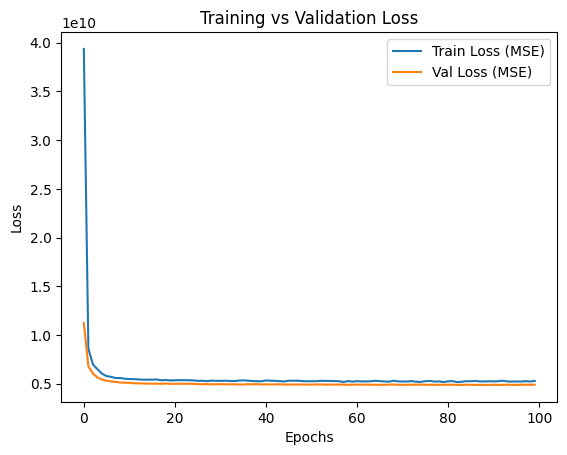

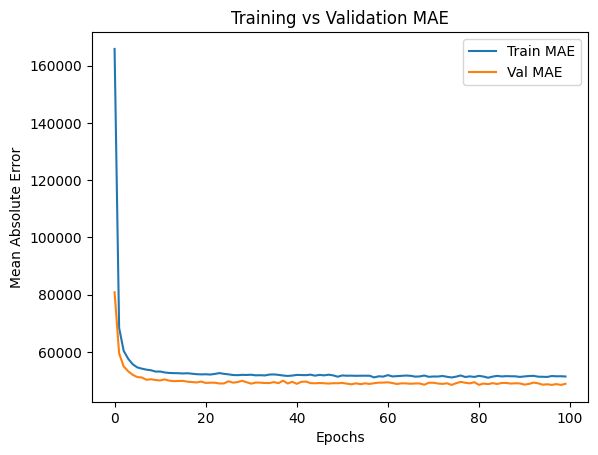

64 nodes, dropout 0.2, lr 0.005, batch_size 64


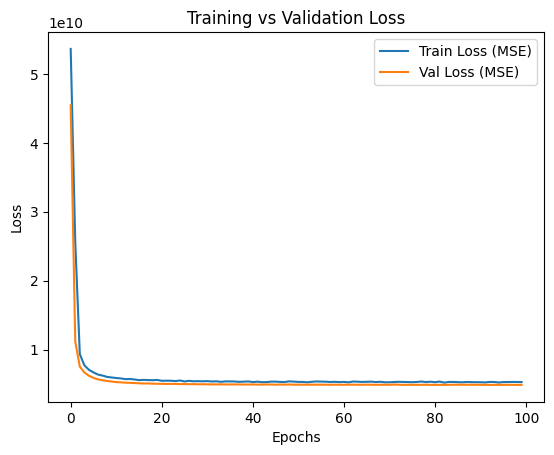

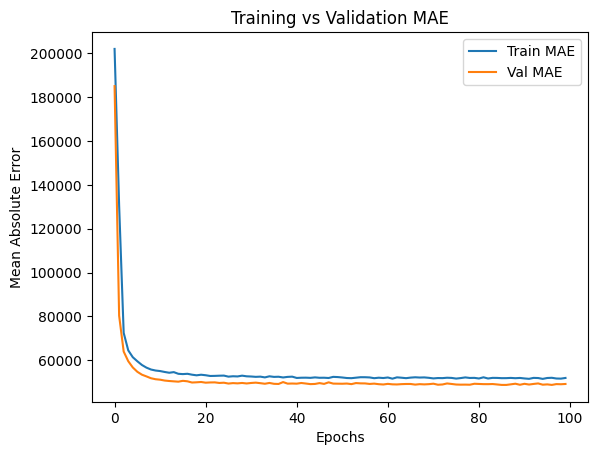

64 nodes, dropout 0.2, lr 0.005, batch_size 128


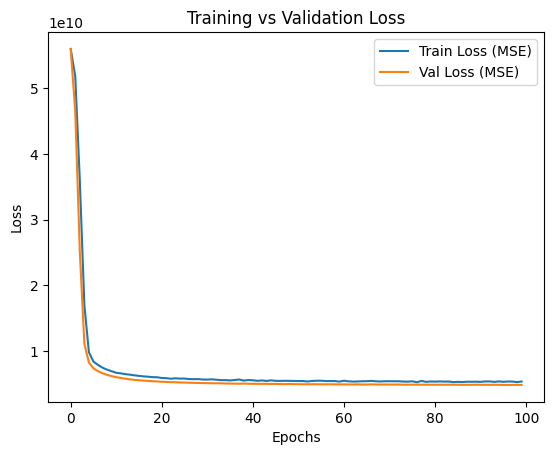

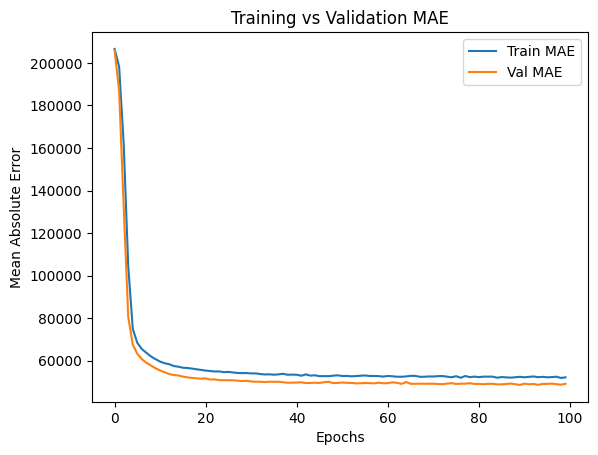

64 nodes, dropout 0.2, lr 0.001, batch_size 32


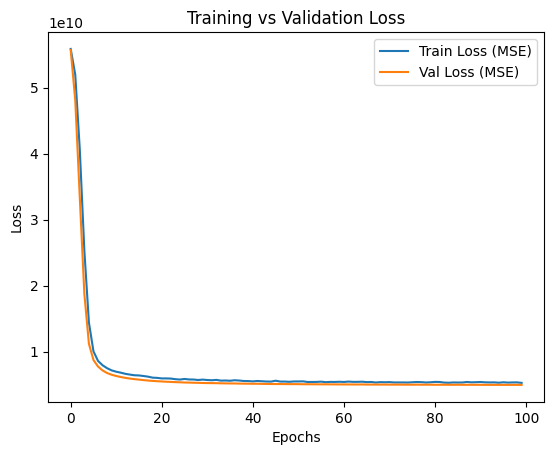

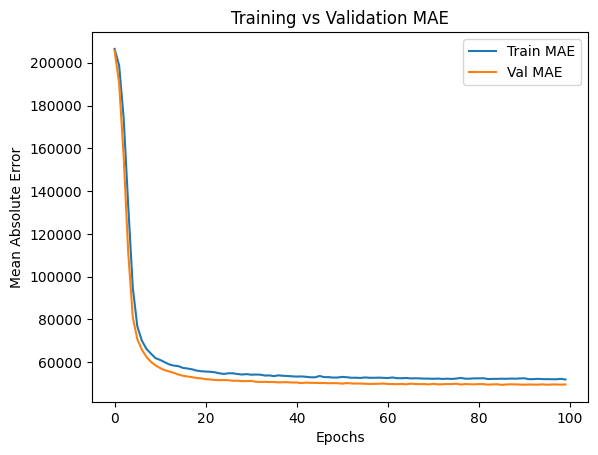

64 nodes, dropout 0.2, lr 0.001, batch_size 64


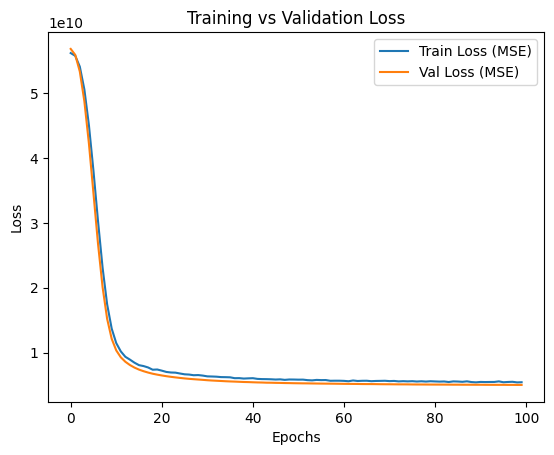

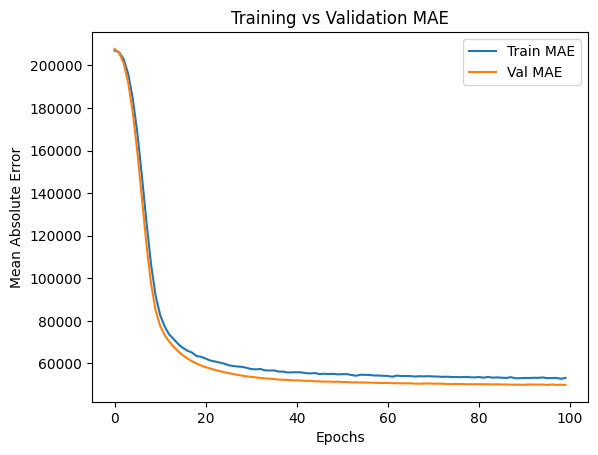

64 nodes, dropout 0.2, lr 0.001, batch_size 128


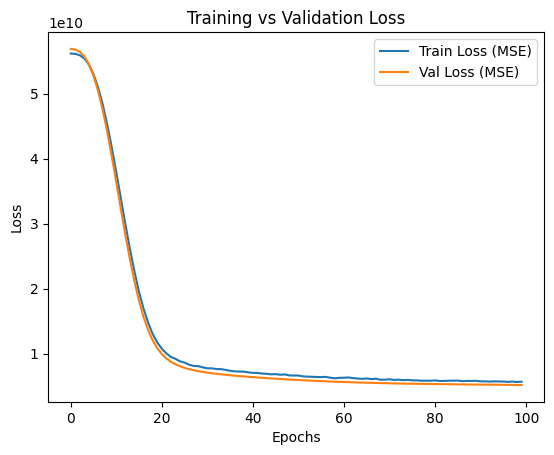

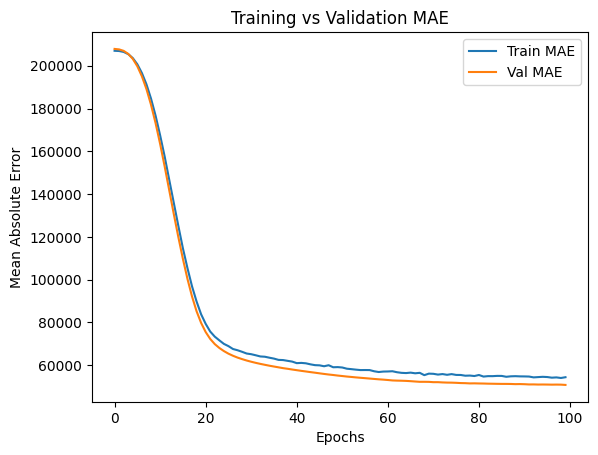

In [39]:
least_val_loss = float('inf')
best_model = None
epochs = 100

for num_nodes in [16, 32, 64]:
    for dropout_prob in [0, 0.2]:
        for lr in [0.01, 0.005, 0.001]:
            for batch_size in [32, 64, 128]:
                print(f'{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch_size {batch_size}')
                
                model, history = train_model(x_train_scaled, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
                
                plot_loss(history)
                plot_mae(history)
                
                val_loss = model.evaluate(x_train_scaled, y_train, verbose=0)[0]  # Still evaluating on training set due to split
                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    best_model = model

In [40]:
test_loss, test_mae = best_model.evaluate(x_test_scaled, y_test)
print(f'\nBest Model Test MSE: {test_loss:.4f}')
print(f'Best Model Test MAE: {test_mae:.4f}')

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5356333568.0000 - mae: 50375.4805

Best Model Test MSE: 4660283904.0000
Best Model Test MAE: 47313.6562


## Using Neural net to get the best R2

In [41]:
results = []
epochs = 100
best_r2 = -float('inf')
best_config = ""
best_model = None

for num_nodes in [16, 32, 64]:
    for dropout_prob in [0, 0.2]:
        for lr in [0.01, 0.005, 0.001]:
            for batch_size in [32, 64, 128]:
                config = f'nodes:{num_nodes}, dropout:{dropout_prob}, lr:{lr}, batch:{batch_size}'
                print(f'Training: {config}')
                
                model, history = train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
                
                y_pred = model.predict(x_test)
                r2 = r2_score(y_test, y_pred)
                
                results.append((config, r2))
                
                if r2 > best_r2:
                    best_r2 = r2
                    best_config = config
                    best_model = model

Training: nodes:16, dropout:0, lr:0.01, batch:32
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Training: nodes:16, dropout:0, lr:0.01, batch:64
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Training: nodes:16, dropout:0, lr:0.01, batch:128
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Training: nodes:16, dropout:0, lr:0.005, batch:32
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Training: nodes:16, dropout:0, lr:0.005, batch:64
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Training: nodes:16, dropout:0, lr:0.005, batch:128
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Training: nodes:16, dropout:0, lr:0.001, batch:32
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Training: nodes:16, dropout:0, lr:0.001, batch:64
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Training: nodes:16, dropout:0, lr:0.001, batch:128
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Training: nodes:16, dropout:0.2, lr:0.01, batch:32
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Training: nodes:16, dropout:0.2, lr:0.01, batch:64
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2m

## Plot of R2 of the configuration of Neural Net Model

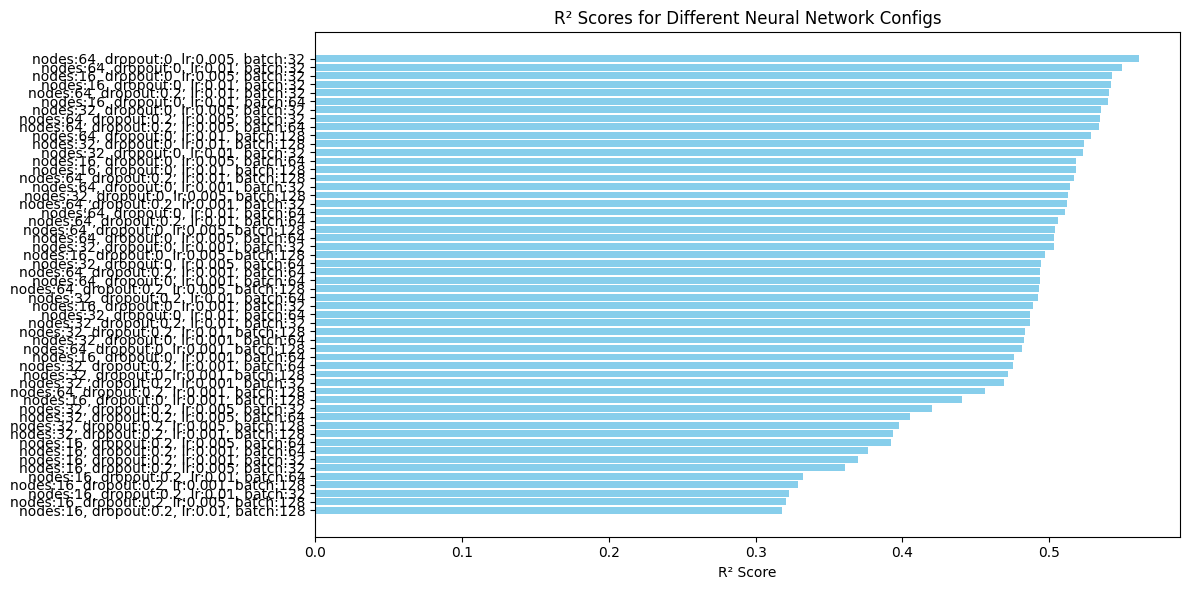

Best Config: nodes:64, dropout:0, lr:0.005, batch:32 with R² = 0.5610


In [42]:
# Sort results by R² score
results.sort(key=lambda x: x[1], reverse=True)

# Plot
plt.figure(figsize=(12, 6))
configs = [r[0] for r in results]
r2_scores = [r[1] for r in results]

plt.barh(configs, r2_scores, color='skyblue')
plt.xlabel('R² Score')
plt.title('R² Scores for Different Neural Network Configs')
plt.gca().invert_yaxis()  # Best at the top
plt.tight_layout()
plt.show()

print(f'Best Config: {best_config} with R² = {best_r2:.4f}')

## Importance feature plot,showing the order of feature importance to the RF model

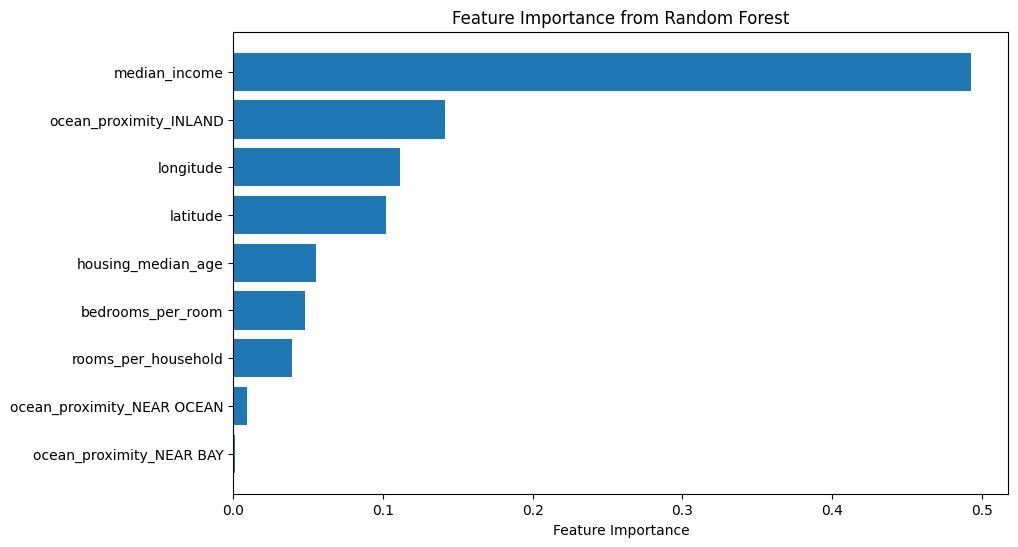

In [41]:
X=data.drop(columns=['median_house_value'])
# Train a random forest regressor


# Get feature importances
importances = RF.feature_importances_

# Sort and plot
indices = importances.argsort()
plt.figure(figsize=(10, 6))
plt.barh(X.columns[indices], importances[indices])
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest')
plt.show()

#The feature importance shows the order of importance of the features to the model, The most important are median income, ocean proximity inland,longitude.

# Gridsearch the LGBMRegressor model

In [38]:
from lightgbm import LGBMRegressor
from sklearn.metrics import make_scorer, r2_score

# Define the model
model = LGBMRegressor()

# Define the parameter grid
param_grid = {
    'num_leaves': [31, 50],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.1, 0.05, 0.01],
    'n_estimators': [100, 200, 300]
}

# Use R2 score for evaluation
scorer = make_scorer(r2_score)

# Grid Search with 5-fold CV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           scoring=scorer, cv=5, verbose=1, n_jobs=-1)

# Fit on training data
grid_search.fit(x_train_scaled, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best R² score:", grid_search.best_score_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000594 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 9
[LightGBM] [Info] Start training from score 207194.693738
Best parameters: {'learning_rate': 0.1, 'max_depth': -1, 'n_estimators': 300, 'num_leaves': 31}
Best R² score: 0.8376899036746466


#Accuracy after optimizing is 84%

## Observations

#The data is more biased towards low income and low house value regions,which may influence model predictions and overall performance

#Higher income areas tend to have significantly higher house prices,even though they make up a small portion of the data

#Model performances was strongest using ensemble methods(Random forest,LightGBM), showing the ability of these models to capture non-linear relationships better than linear regression or even the neural network model
